In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

train = pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Inputs/train_imputed.csv')
test=pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Inputs/test_imputed.csv')
test_id=pd.read_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Inputs/test_imputed.csv')
print(train.head(5))
print(test.head(5))
train.dtypes

   ID  Day_No  Course_ID Course_Domain Course_Type  Short_Promotion  \
0   1       1          1   Development      Course                0   
1   2       2          1   Development      Course                0   
2   3       3          1   Development      Course                0   
3   4       4          1   Development      Course                0   
4   5       5          1   Development      Course                0   

   Public_Holiday  Long_Promotion  User_Traffic  Competition_Metric  Sales  
0               1               1         11004               0.007     81  
1               0               1         13650               0.007     79  
2               0               1         11655               0.007     75  
3               0               1         12054               0.007     80  
4               0               1          6804               0.007     41  
    ID  Day_No  Course_ID Course_Domain Course_Type  Short_Promotion  \
0  883     883          1   Development

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

In [42]:
list = ['ID','Course_ID']

#promotion and holiday flags to be tried as objects seperately

for x in train.columns:
    if x in list:
        train[x]=train[x].astype(np.object)        
    
for x in test.columns:
    if x in list:
        test[x]=test[x].astype(np.object)

test=test.drop(['ID'],axis=1)
train = train.drop(['ID','User_Traffic'],axis=1)

print(test.dtypes)

print(train.shape)
print(test.shape)


Day_No                  int64
Course_ID              object
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
Competition_Metric    float64
dtype: object
(512087, 9)
(36000, 8)


In [43]:
train = pd.get_dummies(train, columns=['Course_ID','Course_Domain','Course_Type'],drop_first=True)
test = pd.get_dummies(test, columns=['Course_ID','Course_Domain','Course_Type'],drop_first=True)

print(train.shape)
print(test.shape)

(512087, 610)
(36000, 609)


In [44]:
#Alternate code for grodsearch

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import fbeta_score, make_scorer
MSE = make_scorer(mean_squared_error, greater_is_better=False)

#RMSE = sqrt(mean_squared_error())

from sklearn.metrics import mean_squared_log_error
#RMSLE=np.sqrt(mean_squared_log_error( y, predictions ))


In [45]:
#Alternate code for gridsearch/tuning

params = {
        'max_depth': [20,30],
        'max_features': [15,25],
        'min_samples_leaf': [50,100],
        'min_samples_split': [200,400],
        'n_estimators': [400, 900]
         }

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

err=[]
y_pred_tot=[]

Xd,yd=train.drop('Sales',axis=1),train.Sales
#from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(verbose=100)
#eval_metric='rmse',
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=params,scoring=MSE, cv=skf.split(Xd,yd),verbose=100 )
# n_jobs=4,
grid.fit(Xd, yd)
#print('\n All results:')
#print(grid.cv_results_)
#print('\n Best estimator:')
#print(grid.best_estimator_)
#print('\n Best score:')
#print(grid.best_score_ * 2 - 1)
#print('\n Best parameters:')
#print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
 
results.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Outputs/RF_tuning_v1_MSEinGridsearch.csv', index=False)
#y_test = grid.best_estimator_.predict_proba(test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


Fitting 2 folds for each of 32 candidates, totalling 64 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=400 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 400
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
building tree 2 of 400
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
building tree 3 of 400
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
building tree 4 of 400
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
building tree 5 of 400
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
building tree 6 of 400
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s remaining:    0.0s
building tree 7 of 400
[Parallel(n_jobs=1)]: Done   7 out of 

[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   27.8s remaining:    0.0s
building tree 78 of 400
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   28.1s remaining:    0.0s
building tree 79 of 400
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   28.4s remaining:    0.0s
building tree 80 of 400
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   28.7s remaining:    0.0s
building tree 81 of 400
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   29.0s remaining:    0.0s
building tree 82 of 400
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   29.3s remaining:    0.0s
building tree 83 of 400
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   29.7s remaining:    0.0s
building tree 84 of 400
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   30.1s remaining:    0.0s
building tree 85 of 400
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   30.4s remaining:    0.0s
building tree 86 of 400
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   30.7s rem

building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  9

[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   22.4s remaining:    0.0s
building tree 64 of 400
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   22.7s remaining:    0.0s
building tree 65 of 400
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   23.0s remaining:    0.0s
building tree 66 of 400
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   23.5s remaining:    0.0s
building tree 67 of 400
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   23.9s remaining:    0.0s
building tree 68 of 400
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   24.1s remaining:    0.0s
building tree 69 of 400
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   24.4s remaining:    0.0s
building tree 70 of 400
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   24.8s remaining:    0.0s
building tree 71 of 400
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   25.1s remaining:    0.0s
building tree 72 of 400
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   25.5s rem

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400


[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  7

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.9s remaining:    0.0s
building tree 51 of 900
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   21.3s remaining:    0.0s
building tree 52 of 900
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   21.7s remaining:    0.0s
building tree 53 of 900
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   22.0s remaining:    0.0s
building tree 54 of 900
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   22.3s remaining:    0.0s
building tree 55 of 900
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   22.7s remaining:    0.0s
building tree 56 of 900
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   23.0s remaining:    0.0s
building tree 57 of 900
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   23.3s remaining:    0.0s
building tree 58 of 900
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   23.7s remaining:    0.0s
building tree 59 of 900
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   24.0s rem

building tree 221 of 900
building tree 222 of 900
building tree 223 of 900
building tree 224 of 900
building tree 225 of 900
building tree 226 of 900
building tree 227 of 900
building tree 228 of 900
building tree 229 of 900
building tree 230 of 900
building tree 231 of 900
building tree 232 of 900
building tree 233 of 900
building tree 234 of 900
building tree 235 of 900
building tree 236 of 900
building tree 237 of 900
building tree 238 of 900
building tree 239 of 900
building tree 240 of 900
building tree 241 of 900
building tree 242 of 900
building tree 243 of 900
building tree 244 of 900
building tree 245 of 900
building tree 246 of 900
building tree 247 of 900
building tree 248 of 900
building tree 249 of 900
building tree 250 of 900
building tree 251 of 900
building tree 252 of 900
building tree 253 of 900
building tree 254 of 900
building tree 255 of 900
building tree 256 of 900
building tree 257 of 900
building tree 258 of 900
building tree 259 of 900
building tree 260 of 900


building tree 549 of 900
building tree 550 of 900
building tree 551 of 900
building tree 552 of 900
building tree 553 of 900
building tree 554 of 900
building tree 555 of 900
building tree 556 of 900
building tree 557 of 900
building tree 558 of 900
building tree 559 of 900
building tree 560 of 900
building tree 561 of 900
building tree 562 of 900
building tree 563 of 900
building tree 564 of 900
building tree 565 of 900
building tree 566 of 900
building tree 567 of 900
building tree 568 of 900
building tree 569 of 900
building tree 570 of 900
building tree 571 of 900
building tree 572 of 900
building tree 573 of 900
building tree 574 of 900
building tree 575 of 900
building tree 576 of 900
building tree 577 of 900
building tree 578 of 900
building tree 579 of 900
building tree 580 of 900
building tree 581 of 900
building tree 582 of 900
building tree 583 of 900
building tree 584 of 900
building tree 585 of 900
building tree 586 of 900
building tree 587 of 900
building tree 588 of 900


building tree 877 of 900
building tree 878 of 900
building tree 879 of 900
building tree 880 of 900
building tree 881 of 900
building tree 882 of 900
building tree 883 of 900
building tree 884 of 900
building tree 885 of 900
building tree 886 of 900
building tree 887 of 900
building tree 888 of 900
building tree 889 of 900
building tree 890 of 900
building tree 891 of 900
building tree 892 of 900
building tree 893 of 900
building tree 894 of 900
building tree 895 of 900
building tree 896 of 900
building tree 897 of 900
building tree 898 of 900
building tree 899 of 900
building tree 900 of 900
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  5.4min finished
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   24.1s finished
[CV]  max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=900, score=-2011.297, total= 5.9min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.2min remaining:    0.0s
[CV] max_depth=20, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=900 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 900
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
building tree 2 of 900
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
building tree 3

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   28.1s remaining:    0.0s
building tree 74 of 900
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   28.4s remaining:    0.0s
building tree 75 of 900
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   28.8s remaining:    0.0s
building tree 76 of 900
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   29.1s remaining:    0.0s
building tree 77 of 900
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   29.5s remaining:    0.0s
building tree 78 of 900
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   29.7s remaining:    0.0s
building tree 79 of 900
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   30.1s remaining:    0.0s
building tree 80 of 900
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   30.4s remaining:    0.0s
building tree 81 of 900
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   30.8s remaining:    0.0s
building tree 82 of 900
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   31.2s rem

building tree 317 of 900
building tree 318 of 900
building tree 319 of 900
building tree 320 of 900
building tree 321 of 900
building tree 322 of 900
building tree 323 of 900
building tree 324 of 900
building tree 325 of 900
building tree 326 of 900
building tree 327 of 900
building tree 328 of 900
building tree 329 of 900
building tree 330 of 900
building tree 331 of 900
building tree 332 of 900
building tree 333 of 900
building tree 334 of 900
building tree 335 of 900
building tree 336 of 900
building tree 337 of 900
building tree 338 of 900
building tree 339 of 900
building tree 340 of 900
building tree 341 of 900
building tree 342 of 900
building tree 343 of 900
building tree 344 of 900
building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900


building tree 645 of 900
building tree 646 of 900
building tree 647 of 900
building tree 648 of 900
building tree 649 of 900
building tree 650 of 900
building tree 651 of 900
building tree 652 of 900
building tree 653 of 900
building tree 654 of 900
building tree 655 of 900
building tree 656 of 900
building tree 657 of 900
building tree 658 of 900
building tree 659 of 900
building tree 660 of 900
building tree 661 of 900
building tree 662 of 900
building tree 663 of 900
building tree 664 of 900
building tree 665 of 900
building tree 666 of 900
building tree 667 of 900
building tree 668 of 900
building tree 669 of 900
building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900
building tree 679 of 900
building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  3

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.2s remaining:    0.0s
building tree 16 of 400
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.6s remaining:    0.0s
building tree 17 of 400
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.9s remaining:    0.0s
building tree 18 of 400
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.4s remaining:    0.0s
building tree 19 of 400
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    6.7s remaining:    0.0s
building tree 20 of 400
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.0s remaining:    0.0s
building tree 21 of 400
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    7.3s remaining:    0.0s
building tree 22 of 400
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    7.6s remaining:    0.0s
building tree 23 of 400
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    7.9s remaining:    0.0s
building tree 24 of 400
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.2s rem

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   32.5s remaining:    0.0s
building tree 95 of 400
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   32.8s remaining:    0.0s
building tree 96 of 400
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   33.2s remaining:    0.0s
building tree 97 of 400
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   33.5s remaining:    0.0s
building tree 98 of 400
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   33.8s remaining:    0.0s
building tree 99 of 400
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   34.1s remaining:    0.0s
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 400
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
building tree 2 of 400
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
building tree 3 of 400
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
building tree 4 of 400
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
building tree 5 of 400
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
building tree 6 of 400
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.9s remaining:    0.0s
building tree 7 of 400
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s
building tree 8 of 400
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s
building tree 9 of 400
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.8s remaining: 

[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   27.9s remaining:    0.0s
building tree 80 of 400
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   28.3s remaining:    0.0s
building tree 81 of 400
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   28.6s remaining:    0.0s
building tree 82 of 400
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   28.9s remaining:    0.0s
building tree 83 of 400
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   29.2s remaining:    0.0s
building tree 84 of 400
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   29.5s remaining:    0.0s
building tree 85 of 400
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   29.8s remaining:    0.0s
building tree 86 of 400
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   30.0s remaining:    0.0s
building tree 87 of 400
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   30.3s remaining:    0.0s
building tree 88 of 400
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   30.6s rem

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  9

[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   20.7s remaining:    0.0s
building tree 65 of 900
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   21.1s remaining:    0.0s
building tree 66 of 900
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   21.3s remaining:    0.0s
building tree 67 of 900
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   21.7s remaining:    0.0s
building tree 68 of 900
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   22.1s remaining:    0.0s
building tree 69 of 900
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   22.4s remaining:    0.0s
building tree 70 of 900
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   22.7s remaining:    0.0s
building tree 71 of 900
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   23.1s remaining:    0.0s
building tree 72 of 900
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   23.4s remaining:    0.0s
building tree 73 of 900
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   23.7s rem

building tree 279 of 900
building tree 280 of 900
building tree 281 of 900
building tree 282 of 900
building tree 283 of 900
building tree 284 of 900
building tree 285 of 900
building tree 286 of 900
building tree 287 of 900
building tree 288 of 900
building tree 289 of 900
building tree 290 of 900
building tree 291 of 900
building tree 292 of 900
building tree 293 of 900
building tree 294 of 900
building tree 295 of 900
building tree 296 of 900
building tree 297 of 900
building tree 298 of 900
building tree 299 of 900
building tree 300 of 900
building tree 301 of 900
building tree 302 of 900
building tree 303 of 900
building tree 304 of 900
building tree 305 of 900
building tree 306 of 900
building tree 307 of 900
building tree 308 of 900
building tree 309 of 900
building tree 310 of 900
building tree 311 of 900
building tree 312 of 900
building tree 313 of 900
building tree 314 of 900
building tree 315 of 900
building tree 316 of 900
building tree 317 of 900
building tree 318 of 900


building tree 607 of 900
building tree 608 of 900
building tree 609 of 900
building tree 610 of 900
building tree 611 of 900
building tree 612 of 900
building tree 613 of 900
building tree 614 of 900
building tree 615 of 900
building tree 616 of 900
building tree 617 of 900
building tree 618 of 900
building tree 619 of 900
building tree 620 of 900
building tree 621 of 900
building tree 622 of 900
building tree 623 of 900
building tree 624 of 900
building tree 625 of 900
building tree 626 of 900
building tree 627 of 900
building tree 628 of 900
building tree 629 of 900
building tree 630 of 900
building tree 631 of 900
building tree 632 of 900
building tree 633 of 900
building tree 634 of 900
building tree 635 of 900
building tree 636 of 900
building tree 637 of 900
building tree 638 of 900
building tree 639 of 900
building tree 640 of 900
building tree 641 of 900
building tree 642 of 900
building tree 643 of 900
building tree 644 of 900
building tree 645 of 900
building tree 646 of 900


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  2

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s remaining:    0.0s
building tree 11 of 900
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.3s remaining:    0.0s
building tree 12 of 900
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.6s remaining:    0.0s
building tree 13 of 900
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.9s remaining:    0.0s
building tree 14 of 900
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.2s remaining:    0.0s
building tree 15 of 900
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.5s remaining:    0.0s
building tree 16 of 900
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.8s remaining:    0.0s
building tree 17 of 900
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.1s remaining:    0.0s
building tree 18 of 900
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    5.4s remaining:    0.0s
building tree 19 of 900
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.6s rem

[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   28.9s remaining:    0.0s
building tree 90 of 900
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   29.3s remaining:    0.0s
building tree 91 of 900
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   29.7s remaining:    0.0s
building tree 92 of 900
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   30.0s remaining:    0.0s
building tree 93 of 900
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   30.3s remaining:    0.0s
building tree 94 of 900
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   30.6s remaining:    0.0s
building tree 95 of 900
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   31.1s remaining:    0.0s
building tree 96 of 900
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   31.4s remaining:    0.0s
building tree 97 of 900
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   31.9s remaining:    0.0s
building tree 98 of 900
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   32.2s rem

building tree 383 of 900
building tree 384 of 900
building tree 385 of 900
building tree 386 of 900
building tree 387 of 900
building tree 388 of 900
building tree 389 of 900
building tree 390 of 900
building tree 391 of 900
building tree 392 of 900
building tree 393 of 900
building tree 394 of 900
building tree 395 of 900
building tree 396 of 900
building tree 397 of 900
building tree 398 of 900
building tree 399 of 900
building tree 400 of 900
building tree 401 of 900
building tree 402 of 900
building tree 403 of 900
building tree 404 of 900
building tree 405 of 900
building tree 406 of 900
building tree 407 of 900
building tree 408 of 900
building tree 409 of 900
building tree 410 of 900
building tree 411 of 900
building tree 412 of 900
building tree 413 of 900
building tree 414 of 900
building tree 415 of 900
building tree 416 of 900
building tree 417 of 900
building tree 418 of 900
building tree 419 of 900
building tree 420 of 900
building tree 421 of 900
building tree 422 of 900


building tree 711 of 900
building tree 712 of 900
building tree 713 of 900
building tree 714 of 900
building tree 715 of 900
building tree 716 of 900
building tree 717 of 900
building tree 718 of 900
building tree 719 of 900
building tree 720 of 900
building tree 721 of 900
building tree 722 of 900
building tree 723 of 900
building tree 724 of 900
building tree 725 of 900
building tree 726 of 900
building tree 727 of 900
building tree 728 of 900
building tree 729 of 900
building tree 730 of 900
building tree 731 of 900
building tree 732 of 900
building tree 733 of 900
building tree 734 of 900
building tree 735 of 900
building tree 736 of 900
building tree 737 of 900
building tree 738 of 900
building tree 739 of 900
building tree 740 of 900
building tree 741 of 900
building tree 742 of 900
building tree 743 of 900
building tree 744 of 900
building tree 745 of 900
building tree 746 of 900
building tree 747 of 900
building tree 748 of 900
building tree 749 of 900
building tree 750 of 900


[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  5

[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.0s remaining:    0.0s
building tree 35 of 400
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   10.3s remaining:    0.0s
building tree 36 of 400
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   10.6s remaining:    0.0s
building tree 37 of 400
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   10.8s remaining:    0.0s
building tree 38 of 400
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   11.1s remaining:    0.0s
building tree 39 of 400
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   11.4s remaining:    0.0s
building tree 40 of 400
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   11.6s remaining:    0.0s
building tree 41 of 400
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   11.9s remaining:    0.0s
building tree 42 of 400
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   12.3s remaining:    0.0s
building tree 43 of 400
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   12.6s rem

building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  4

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    6.7s remaining:    0.0s
building tree 22 of 400
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    7.0s remaining:    0.0s
building tree 23 of 400
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    7.4s remaining:    0.0s
building tree 24 of 400
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    7.7s remaining:    0.0s
building tree 25 of 400
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    7.9s remaining:    0.0s
building tree 26 of 400
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    8.3s remaining:    0.0s
building tree 27 of 400
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    8.6s remaining:    0.0s
building tree 28 of 400
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    8.9s remaining:    0.0s
building tree 29 of 400
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    9.2s remaining:    0.0s
building tree 30 of 400
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.5s rem

building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  2

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s remaining:    0.0s
building tree 7 of 900
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s
building tree 8 of 900
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s
building tree 9 of 900
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.0s remaining:    0.0s
building tree 10 of 900
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.3s remaining:    0.0s
building tree 11 of 900
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.7s remaining:    0.0s
building tree 12 of 900
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.1s remaining:    0.0s
building tree 13 of 900
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.4s remaining:    0.0s
building tree 14 of 900
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    4.7s remaining:    0.0s
building tree 15 of 900
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.0s remain

[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   27.1s remaining:    0.0s
building tree 86 of 900
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   27.5s remaining:    0.0s
building tree 87 of 900
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   27.7s remaining:    0.0s
building tree 88 of 900
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   28.0s remaining:    0.0s
building tree 89 of 900
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   28.3s remaining:    0.0s
building tree 90 of 900
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   28.5s remaining:    0.0s
building tree 91 of 900
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   28.8s remaining:    0.0s
building tree 92 of 900
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   29.1s remaining:    0.0s
building tree 93 of 900
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   29.4s remaining:    0.0s
building tree 94 of 900
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   29.6s rem

building tree 367 of 900
building tree 368 of 900
building tree 369 of 900
building tree 370 of 900
building tree 371 of 900
building tree 372 of 900
building tree 373 of 900
building tree 374 of 900
building tree 375 of 900
building tree 376 of 900
building tree 377 of 900
building tree 378 of 900
building tree 379 of 900
building tree 380 of 900
building tree 381 of 900
building tree 382 of 900
building tree 383 of 900
building tree 384 of 900
building tree 385 of 900
building tree 386 of 900
building tree 387 of 900
building tree 388 of 900
building tree 389 of 900
building tree 390 of 900
building tree 391 of 900
building tree 392 of 900
building tree 393 of 900
building tree 394 of 900
building tree 395 of 900
building tree 396 of 900
building tree 397 of 900
building tree 398 of 900
building tree 399 of 900
building tree 400 of 900
building tree 401 of 900
building tree 402 of 900
building tree 403 of 900
building tree 404 of 900
building tree 405 of 900
building tree 406 of 900


building tree 695 of 900
building tree 696 of 900
building tree 697 of 900
building tree 698 of 900
building tree 699 of 900
building tree 700 of 900
building tree 701 of 900
building tree 702 of 900
building tree 703 of 900
building tree 704 of 900
building tree 705 of 900
building tree 706 of 900
building tree 707 of 900
building tree 708 of 900
building tree 709 of 900
building tree 710 of 900
building tree 711 of 900
building tree 712 of 900
building tree 713 of 900
building tree 714 of 900
building tree 715 of 900
building tree 716 of 900
building tree 717 of 900
building tree 718 of 900
building tree 719 of 900
building tree 720 of 900
building tree 721 of 900
building tree 722 of 900
building tree 723 of 900
building tree 724 of 900
building tree 725 of 900
building tree 726 of 900
building tree 727 of 900
building tree 728 of 900
building tree 729 of 900
building tree 730 of 900
building tree 731 of 900
building tree 732 of 900
building tree 733 of 900
building tree 734 of 900


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  5

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   10.2s remaining:    0.0s
building tree 30 of 900
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.6s remaining:    0.0s
building tree 31 of 900
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   10.9s remaining:    0.0s
building tree 32 of 900
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   11.1s remaining:    0.0s
building tree 33 of 900
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   11.4s remaining:    0.0s
building tree 34 of 900
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.7s remaining:    0.0s
building tree 35 of 900
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   12.0s remaining:    0.0s
building tree 36 of 900
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   12.3s remaining:    0.0s
building tree 37 of 900
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   12.6s remaining:    0.0s
building tree 38 of 900
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   13.0s rem

building tree 134 of 900
building tree 135 of 900
building tree 136 of 900
building tree 137 of 900
building tree 138 of 900
building tree 139 of 900
building tree 140 of 900
building tree 141 of 900
building tree 142 of 900
building tree 143 of 900
building tree 144 of 900
building tree 145 of 900
building tree 146 of 900
building tree 147 of 900
building tree 148 of 900
building tree 149 of 900
building tree 150 of 900
building tree 151 of 900
building tree 152 of 900
building tree 153 of 900
building tree 154 of 900
building tree 155 of 900
building tree 156 of 900
building tree 157 of 900
building tree 158 of 900
building tree 159 of 900
building tree 160 of 900
building tree 161 of 900
building tree 162 of 900
building tree 163 of 900
building tree 164 of 900
building tree 165 of 900
building tree 166 of 900
building tree 167 of 900
building tree 168 of 900
building tree 169 of 900
building tree 170 of 900
building tree 171 of 900
building tree 172 of 900
building tree 173 of 900


building tree 462 of 900
building tree 463 of 900
building tree 464 of 900
building tree 465 of 900
building tree 466 of 900
building tree 467 of 900
building tree 468 of 900
building tree 469 of 900
building tree 470 of 900
building tree 471 of 900
building tree 472 of 900
building tree 473 of 900
building tree 474 of 900
building tree 475 of 900
building tree 476 of 900
building tree 477 of 900
building tree 478 of 900
building tree 479 of 900
building tree 480 of 900
building tree 481 of 900
building tree 482 of 900
building tree 483 of 900
building tree 484 of 900
building tree 485 of 900
building tree 486 of 900
building tree 487 of 900
building tree 488 of 900
building tree 489 of 900
building tree 490 of 900
building tree 491 of 900
building tree 492 of 900
building tree 493 of 900
building tree 494 of 900
building tree 495 of 900
building tree 496 of 900
building tree 497 of 900
building tree 498 of 900
building tree 499 of 900
building tree 500 of 900
building tree 501 of 900


building tree 790 of 900
building tree 791 of 900
building tree 792 of 900
building tree 793 of 900
building tree 794 of 900
building tree 795 of 900
building tree 796 of 900
building tree 797 of 900
building tree 798 of 900
building tree 799 of 900
building tree 800 of 900
building tree 801 of 900
building tree 802 of 900
building tree 803 of 900
building tree 804 of 900
building tree 805 of 900
building tree 806 of 900
building tree 807 of 900
building tree 808 of 900
building tree 809 of 900
building tree 810 of 900
building tree 811 of 900
building tree 812 of 900
building tree 813 of 900
building tree 814 of 900
building tree 815 of 900
building tree 816 of 900
building tree 817 of 900
building tree 818 of 900
building tree 819 of 900
building tree 820 of 900
building tree 821 of 900
building tree 822 of 900
building tree 823 of 900
building tree 824 of 900
building tree 825 of 900
building tree 826 of 900
building tree 827 of 900
building tree 828 of 900
building tree 829 of 900


[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  8

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   16.0s remaining:    0.0s
building tree 53 of 400
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   16.3s remaining:    0.0s
building tree 54 of 400
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   16.6s remaining:    0.0s
building tree 55 of 400
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   16.9s remaining:    0.0s
building tree 56 of 400
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   17.2s remaining:    0.0s
building tree 57 of 400
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   17.6s remaining:    0.0s
building tree 58 of 400
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   17.9s remaining:    0.0s
building tree 59 of 400
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   18.2s remaining:    0.0s
building tree 60 of 400
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.5s remaining:    0.0s
building tree 61 of 400
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   18.9s rem

building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400


[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  6

[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   14.0s remaining:    0.0s
building tree 39 of 400
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   14.2s remaining:    0.0s
building tree 40 of 400
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.5s remaining:    0.0s
building tree 41 of 400
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   14.8s remaining:    0.0s
building tree 42 of 400
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   15.1s remaining:    0.0s
building tree 43 of 400
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   15.4s remaining:    0.0s
building tree 44 of 400
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   15.7s remaining:    0.0s
building tree 45 of 400
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   16.0s remaining:    0.0s
building tree 46 of 400
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   16.2s remaining:    0.0s
building tree 47 of 400
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   16.5s rem

building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  4

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    7.8s remaining:    0.0s
building tree 27 of 900
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    8.2s remaining:    0.0s
building tree 28 of 900
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    8.5s remaining:    0.0s
building tree 29 of 900
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    8.8s remaining:    0.0s
building tree 30 of 900
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.0s remaining:    0.0s
building tree 31 of 900
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    9.4s remaining:    0.0s
building tree 32 of 900
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    9.6s remaining:    0.0s
building tree 33 of 900
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   10.0s remaining:    0.0s
building tree 34 of 900
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.2s remaining:    0.0s
building tree 35 of 900
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   10.7s rem

building tree 121 of 900
building tree 122 of 900
building tree 123 of 900
building tree 124 of 900
building tree 125 of 900
building tree 126 of 900
building tree 127 of 900
building tree 128 of 900
building tree 129 of 900
building tree 130 of 900
building tree 131 of 900
building tree 132 of 900
building tree 133 of 900
building tree 134 of 900
building tree 135 of 900
building tree 136 of 900
building tree 137 of 900
building tree 138 of 900
building tree 139 of 900
building tree 140 of 900
building tree 141 of 900
building tree 142 of 900
building tree 143 of 900
building tree 144 of 900
building tree 145 of 900
building tree 146 of 900
building tree 147 of 900
building tree 148 of 900
building tree 149 of 900
building tree 150 of 900
building tree 151 of 900
building tree 152 of 900
building tree 153 of 900
building tree 154 of 900
building tree 155 of 900
building tree 156 of 900
building tree 157 of 900
building tree 158 of 900
building tree 159 of 900
building tree 160 of 900


building tree 449 of 900
building tree 450 of 900
building tree 451 of 900
building tree 452 of 900
building tree 453 of 900
building tree 454 of 900
building tree 455 of 900
building tree 456 of 900
building tree 457 of 900
building tree 458 of 900
building tree 459 of 900
building tree 460 of 900
building tree 461 of 900
building tree 462 of 900
building tree 463 of 900
building tree 464 of 900
building tree 465 of 900
building tree 466 of 900
building tree 467 of 900
building tree 468 of 900
building tree 469 of 900
building tree 470 of 900
building tree 471 of 900
building tree 472 of 900
building tree 473 of 900
building tree 474 of 900
building tree 475 of 900
building tree 476 of 900
building tree 477 of 900
building tree 478 of 900
building tree 479 of 900
building tree 480 of 900
building tree 481 of 900
building tree 482 of 900
building tree 483 of 900
building tree 484 of 900
building tree 485 of 900
building tree 486 of 900
building tree 487 of 900
building tree 488 of 900


building tree 777 of 900
building tree 778 of 900
building tree 779 of 900
building tree 780 of 900
building tree 781 of 900
building tree 782 of 900
building tree 783 of 900
building tree 784 of 900
building tree 785 of 900
building tree 786 of 900
building tree 787 of 900
building tree 788 of 900
building tree 789 of 900
building tree 790 of 900
building tree 791 of 900
building tree 792 of 900
building tree 793 of 900
building tree 794 of 900
building tree 795 of 900
building tree 796 of 900
building tree 797 of 900
building tree 798 of 900
building tree 799 of 900
building tree 800 of 900
building tree 801 of 900
building tree 802 of 900
building tree 803 of 900
building tree 804 of 900
building tree 805 of 900
building tree 806 of 900
building tree 807 of 900
building tree 808 of 900
building tree 809 of 900
building tree 810 of 900
building tree 811 of 900
building tree 812 of 900
building tree 813 of 900
building tree 814 of 900
building tree 815 of 900
building tree 816 of 900


[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  7

[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   13.5s remaining:    0.0s
building tree 47 of 900
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   13.8s remaining:    0.0s
building tree 48 of 900
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   14.1s remaining:    0.0s
building tree 49 of 900
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   14.3s remaining:    0.0s
building tree 50 of 900
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.6s remaining:    0.0s
building tree 51 of 900
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   14.9s remaining:    0.0s
building tree 52 of 900
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   15.3s remaining:    0.0s
building tree 53 of 900
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   15.5s remaining:    0.0s
building tree 54 of 900
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   15.8s remaining:    0.0s
building tree 55 of 900
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   16.1s rem

building tree 205 of 900
building tree 206 of 900
building tree 207 of 900
building tree 208 of 900
building tree 209 of 900
building tree 210 of 900
building tree 211 of 900
building tree 212 of 900
building tree 213 of 900
building tree 214 of 900
building tree 215 of 900
building tree 216 of 900
building tree 217 of 900
building tree 218 of 900
building tree 219 of 900
building tree 220 of 900
building tree 221 of 900
building tree 222 of 900
building tree 223 of 900
building tree 224 of 900
building tree 225 of 900
building tree 226 of 900
building tree 227 of 900
building tree 228 of 900
building tree 229 of 900
building tree 230 of 900
building tree 231 of 900
building tree 232 of 900
building tree 233 of 900
building tree 234 of 900
building tree 235 of 900
building tree 236 of 900
building tree 237 of 900
building tree 238 of 900
building tree 239 of 900
building tree 240 of 900
building tree 241 of 900
building tree 242 of 900
building tree 243 of 900
building tree 244 of 900


building tree 533 of 900
building tree 534 of 900
building tree 535 of 900
building tree 536 of 900
building tree 537 of 900
building tree 538 of 900
building tree 539 of 900
building tree 540 of 900
building tree 541 of 900
building tree 542 of 900
building tree 543 of 900
building tree 544 of 900
building tree 545 of 900
building tree 546 of 900
building tree 547 of 900
building tree 548 of 900
building tree 549 of 900
building tree 550 of 900
building tree 551 of 900
building tree 552 of 900
building tree 553 of 900
building tree 554 of 900
building tree 555 of 900
building tree 556 of 900
building tree 557 of 900
building tree 558 of 900
building tree 559 of 900
building tree 560 of 900
building tree 561 of 900
building tree 562 of 900
building tree 563 of 900
building tree 564 of 900
building tree 565 of 900
building tree 566 of 900
building tree 567 of 900
building tree 568 of 900
building tree 569 of 900
building tree 570 of 900
building tree 571 of 900
building tree 572 of 900


building tree 861 of 900
building tree 862 of 900
building tree 863 of 900
building tree 864 of 900
building tree 865 of 900
building tree 866 of 900
building tree 867 of 900
building tree 868 of 900
building tree 869 of 900
building tree 870 of 900
building tree 871 of 900
building tree 872 of 900
building tree 873 of 900
building tree 874 of 900
building tree 875 of 900
building tree 876 of 900
building tree 877 of 900
building tree 878 of 900
building tree 879 of 900
building tree 880 of 900
building tree 881 of 900
building tree 882 of 900
building tree 883 of 900
building tree 884 of 900
building tree 885 of 900
building tree 886 of 900
building tree 887 of 900
building tree 888 of 900
building tree 889 of 900
building tree 890 of 900
building tree 891 of 900
building tree 892 of 900
building tree 893 of 900
building tree 894 of 900
building tree 895 of 900
building tree 896 of 900
building tree 897 of 900
building tree 898 of 900
building tree 899 of 900
building tree 900 of 900


[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   22.0s finished
[CV]  max_depth=20, max_features=15, min_samples_leaf=100, min_samples_split=400, n_estimators=900, score=-2019.788, total= 4.9min
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 63.9min remaining:    0.0s
[CV] max_depth=20, max_features=25, min_samples_leaf=50, min_samples_split=200, n_estimators=400 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 400
[Parallel(n_jobs=1)]: Done   1 out of

[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   31.7s remaining:    0.0s
building tree 72 of 400
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   32.1s remaining:    0.0s
building tree 73 of 400
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   32.5s remaining:    0.0s
building tree 74 of 400
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   33.0s remaining:    0.0s
building tree 75 of 400
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   33.4s remaining:    0.0s
building tree 76 of 400
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   33.9s remaining:    0.0s
building tree 77 of 400
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   34.6s remaining:    0.0s
building tree 78 of 400
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   35.1s remaining:    0.0s
building tree 79 of 400
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   35.6s remaining:    0.0s
building tree 80 of 400
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.0s rem

building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400


[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  9

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   28.1s remaining:    0.0s
building tree 61 of 400
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   28.7s remaining:    0.0s
building tree 62 of 400
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   29.3s remaining:    0.0s
building tree 63 of 400
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   29.8s remaining:    0.0s
building tree 64 of 400
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   30.3s remaining:    0.0s
building tree 65 of 400
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   30.7s remaining:    0.0s
building tree 66 of 400
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   31.1s remaining:    0.0s
building tree 67 of 400
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   31.9s remaining:    0.0s
building tree 68 of 400
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   32.4s remaining:    0.0s
building tree 69 of 400
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   32.8s rem

building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400


[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  7

[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   20.8s remaining:    0.0s
building tree 47 of 900
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   21.2s remaining:    0.0s
building tree 48 of 900
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   21.7s remaining:    0.0s
building tree 49 of 900
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   22.3s remaining:    0.0s
building tree 50 of 900
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.8s remaining:    0.0s
building tree 51 of 900
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   23.3s remaining:    0.0s
building tree 52 of 900
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   23.8s remaining:    0.0s
building tree 53 of 900
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   24.2s remaining:    0.0s
building tree 54 of 900
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   24.7s remaining:    0.0s
building tree 55 of 900
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   25.1s rem

building tree 205 of 900
building tree 206 of 900
building tree 207 of 900
building tree 208 of 900
building tree 209 of 900
building tree 210 of 900
building tree 211 of 900
building tree 212 of 900
building tree 213 of 900
building tree 214 of 900
building tree 215 of 900
building tree 216 of 900
building tree 217 of 900
building tree 218 of 900
building tree 219 of 900
building tree 220 of 900
building tree 221 of 900
building tree 222 of 900
building tree 223 of 900
building tree 224 of 900
building tree 225 of 900
building tree 226 of 900
building tree 227 of 900
building tree 228 of 900
building tree 229 of 900
building tree 230 of 900
building tree 231 of 900
building tree 232 of 900
building tree 233 of 900
building tree 234 of 900
building tree 235 of 900
building tree 236 of 900
building tree 237 of 900
building tree 238 of 900
building tree 239 of 900
building tree 240 of 900
building tree 241 of 900
building tree 242 of 900
building tree 243 of 900
building tree 244 of 900


building tree 533 of 900
building tree 534 of 900
building tree 535 of 900
building tree 536 of 900
building tree 537 of 900
building tree 538 of 900
building tree 539 of 900
building tree 540 of 900
building tree 541 of 900
building tree 542 of 900
building tree 543 of 900
building tree 544 of 900
building tree 545 of 900
building tree 546 of 900
building tree 547 of 900
building tree 548 of 900
building tree 549 of 900
building tree 550 of 900
building tree 551 of 900
building tree 552 of 900
building tree 553 of 900
building tree 554 of 900
building tree 555 of 900
building tree 556 of 900
building tree 557 of 900
building tree 558 of 900
building tree 559 of 900
building tree 560 of 900
building tree 561 of 900
building tree 562 of 900
building tree 563 of 900
building tree 564 of 900
building tree 565 of 900
building tree 566 of 900
building tree 567 of 900
building tree 568 of 900
building tree 569 of 900
building tree 570 of 900
building tree 571 of 900
building tree 572 of 900


building tree 861 of 900
building tree 862 of 900
building tree 863 of 900
building tree 864 of 900
building tree 865 of 900
building tree 866 of 900
building tree 867 of 900
building tree 868 of 900
building tree 869 of 900
building tree 870 of 900
building tree 871 of 900
building tree 872 of 900
building tree 873 of 900
building tree 874 of 900
building tree 875 of 900
building tree 876 of 900
building tree 877 of 900
building tree 878 of 900
building tree 879 of 900
building tree 880 of 900
building tree 881 of 900
building tree 882 of 900
building tree 883 of 900
building tree 884 of 900
building tree 885 of 900
building tree 886 of 900
building tree 887 of 900
building tree 888 of 900
building tree 889 of 900
building tree 890 of 900
building tree 891 of 900
building tree 892 of 900
building tree 893 of 900
building tree 894 of 900
building tree 895 of 900
building tree 896 of 900
building tree 897 of 900
building tree 898 of 900
building tree 899 of 900
building tree 900 of 900


[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   21.8s finished
[CV]  max_depth=20, max_features=25, min_samples_leaf=50, min_samples_split=200, n_estimators=900, score=-1772.770, total= 7.9min
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 78.8min remaining:    0.0s
[CV] max_depth=20, max_features=25, min_samples_leaf=50, min_samples_split=200, n_estimators=900 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 c

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   32.7s remaining:    0.0s
building tree 71 of 900
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   33.0s remaining:    0.0s
building tree 72 of 900
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   33.5s remaining:    0.0s
building tree 73 of 900
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   34.0s remaining:    0.0s
building tree 74 of 900
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   34.4s remaining:    0.0s
building tree 75 of 900
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   34.9s remaining:    0.0s
building tree 76 of 900
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   35.8s remaining:    0.0s
building tree 77 of 900
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   36.4s remaining:    0.0s
building tree 78 of 900
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   36.9s remaining:    0.0s
building tree 79 of 900
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   37.4s rem

building tree 304 of 900
building tree 305 of 900
building tree 306 of 900
building tree 307 of 900
building tree 308 of 900
building tree 309 of 900
building tree 310 of 900
building tree 311 of 900
building tree 312 of 900
building tree 313 of 900
building tree 314 of 900
building tree 315 of 900
building tree 316 of 900
building tree 317 of 900
building tree 318 of 900
building tree 319 of 900
building tree 320 of 900
building tree 321 of 900
building tree 322 of 900
building tree 323 of 900
building tree 324 of 900
building tree 325 of 900
building tree 326 of 900
building tree 327 of 900
building tree 328 of 900
building tree 329 of 900
building tree 330 of 900
building tree 331 of 900
building tree 332 of 900
building tree 333 of 900
building tree 334 of 900
building tree 335 of 900
building tree 336 of 900
building tree 337 of 900
building tree 338 of 900
building tree 339 of 900
building tree 340 of 900
building tree 341 of 900
building tree 342 of 900
building tree 343 of 900


building tree 632 of 900
building tree 633 of 900
building tree 634 of 900
building tree 635 of 900
building tree 636 of 900
building tree 637 of 900
building tree 638 of 900
building tree 639 of 900
building tree 640 of 900
building tree 641 of 900
building tree 642 of 900
building tree 643 of 900
building tree 644 of 900
building tree 645 of 900
building tree 646 of 900
building tree 647 of 900
building tree 648 of 900
building tree 649 of 900
building tree 650 of 900
building tree 651 of 900
building tree 652 of 900
building tree 653 of 900
building tree 654 of 900
building tree 655 of 900
building tree 656 of 900
building tree 657 of 900
building tree 658 of 900
building tree 659 of 900
building tree 660 of 900
building tree 661 of 900
building tree 662 of 900
building tree 663 of 900
building tree 664 of 900
building tree 665 of 900
building tree 666 of 900
building tree 667 of 900
building tree 668 of 900
building tree 669 of 900
building tree 670 of 900
building tree 671 of 900


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  2

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.9s remaining:    0.0s
building tree 12 of 400
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.4s remaining:    0.0s
building tree 13 of 400
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.0s remaining:    0.0s
building tree 14 of 400
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    6.6s remaining:    0.0s
building tree 15 of 400
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    7.0s remaining:    0.0s
building tree 16 of 400
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    7.5s remaining:    0.0s
building tree 17 of 400
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    8.0s remaining:    0.0s
building tree 18 of 400
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    8.5s remaining:    0.0s
building tree 19 of 400
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.9s remaining:    0.0s
building tree 20 of 400
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    9.4s rem

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   41.4s remaining:    0.0s
building tree 91 of 400
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   41.9s remaining:    0.0s
building tree 92 of 400
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   42.5s remaining:    0.0s
building tree 93 of 400
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   43.2s remaining:    0.0s
building tree 94 of 400
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   43.7s remaining:    0.0s
building tree 95 of 400
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   44.1s remaining:    0.0s
building tree 96 of 400
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   44.5s remaining:    0.0s
building tree 97 of 400
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   44.9s remaining:    0.0s
building tree 98 of 400
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   45.3s remaining:    0.0s
building tree 99 of 400
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   45.7s rem

building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.2min finished
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   10.3s finished
[CV]  max_depth=20, max_features=25, min_samples_leaf=50, min_samples_split=400, n_estimators=400, score=-1801.650, total= 3.5min
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 89.9min remaining:    0.0s
[CV] max_depth=20, max_features=25, min_samples_leaf=50, min_samples_split=400, n_estimators=400 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 400
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
building tree 2 of 400
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
building tree 3 of 400
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
building tree 4 of 400
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
building tree 5 of 400
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
building tree 6 of 400
[Pa

[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   35.5s remaining:    0.0s
building tree 77 of 400
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   36.1s remaining:    0.0s
building tree 78 of 400
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   36.7s remaining:    0.0s
building tree 79 of 400
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   37.2s remaining:    0.0s
building tree 80 of 400
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   37.7s remaining:    0.0s
building tree 81 of 400
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   38.3s remaining:    0.0s
building tree 82 of 400
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   38.8s remaining:    0.0s
building tree 83 of 400
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   39.3s remaining:    0.0s
building tree 84 of 400
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   39.9s remaining:    0.0s
building tree 85 of 400
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   40.3s rem

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  9

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.9s remaining:    0.0s
building tree 61 of 900
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   28.4s remaining:    0.0s
building tree 62 of 900
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   28.9s remaining:    0.0s
building tree 63 of 900
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   29.3s remaining:    0.0s
building tree 64 of 900
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   29.8s remaining:    0.0s
building tree 65 of 900
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   30.3s remaining:    0.0s
building tree 66 of 900
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   30.8s remaining:    0.0s
building tree 67 of 900
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   31.3s remaining:    0.0s
building tree 68 of 900
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   31.6s remaining:    0.0s
building tree 69 of 900
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   32.0s rem

building tree 263 of 900
building tree 264 of 900
building tree 265 of 900
building tree 266 of 900
building tree 267 of 900
building tree 268 of 900
building tree 269 of 900
building tree 270 of 900
building tree 271 of 900
building tree 272 of 900
building tree 273 of 900
building tree 274 of 900
building tree 275 of 900
building tree 276 of 900
building tree 277 of 900
building tree 278 of 900
building tree 279 of 900
building tree 280 of 900
building tree 281 of 900
building tree 282 of 900
building tree 283 of 900
building tree 284 of 900
building tree 285 of 900
building tree 286 of 900
building tree 287 of 900
building tree 288 of 900
building tree 289 of 900
building tree 290 of 900
building tree 291 of 900
building tree 292 of 900
building tree 293 of 900
building tree 294 of 900
building tree 295 of 900
building tree 296 of 900
building tree 297 of 900
building tree 298 of 900
building tree 299 of 900
building tree 300 of 900
building tree 301 of 900
building tree 302 of 900


building tree 591 of 900
building tree 592 of 900
building tree 593 of 900
building tree 594 of 900
building tree 595 of 900
building tree 596 of 900
building tree 597 of 900
building tree 598 of 900
building tree 599 of 900
building tree 600 of 900
building tree 601 of 900
building tree 602 of 900
building tree 603 of 900
building tree 604 of 900
building tree 605 of 900
building tree 606 of 900
building tree 607 of 900
building tree 608 of 900
building tree 609 of 900
building tree 610 of 900
building tree 611 of 900
building tree 612 of 900
building tree 613 of 900
building tree 614 of 900
building tree 615 of 900
building tree 616 of 900
building tree 617 of 900
building tree 618 of 900
building tree 619 of 900
building tree 620 of 900
building tree 621 of 900
building tree 622 of 900
building tree 623 of 900
building tree 624 of 900
building tree 625 of 900
building tree 626 of 900
building tree 627 of 900
building tree 628 of 900
building tree 629 of 900
building tree 630 of 900


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  1

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
building tree 5 of 900
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s
building tree 6 of 900
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s
building tree 7 of 900
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.6s remaining:    0.0s
building tree 8 of 900
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.2s remaining:    0.0s
building tree 9 of 900
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.6s remaining:    0.0s
building tree 10 of 900
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s remaining:    0.0s
building tree 11 of 900
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.7s remaining:    0.0s
building tree 12 of 900
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.2s remaining:    0.0s
building tree 13 of 900
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.7s remainin

[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   39.6s remaining:    0.0s
building tree 84 of 900
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   40.2s remaining:    0.0s
building tree 85 of 900
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   40.6s remaining:    0.0s
building tree 86 of 900
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   41.1s remaining:    0.0s
building tree 87 of 900
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   41.6s remaining:    0.0s
building tree 88 of 900
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   42.1s remaining:    0.0s
building tree 89 of 900
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   42.6s remaining:    0.0s
building tree 90 of 900
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   43.2s remaining:    0.0s
building tree 91 of 900
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   43.6s remaining:    0.0s
building tree 92 of 900
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   44.0s rem

building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900
building tree 369 of 900
building tree 370 of 900
building tree 371 of 900
building tree 372 of 900
building tree 373 of 900
building tree 374 of 900
building tree 375 of 900
building tree 376 of 900
building tree 377 of 900
building tree 378 of 900
building tree 379 of 900
building tree 380 of 900
building tree 381 of 900
building tree 382 of 900
building tree 383 of 900
building tree 384 of 900
building tree 385 of 900
building tree 386 of 900
building tree 387 of 900
building tree 388 of 900
building tree 389 of 900
building tree 390 of 900
building tree 391 of 900
building tree 392 of 900
building tree 393 of 900
building tree 394 of 900
building tree 395 of 900
building tree 396 of 900
building tree 397 of 900


building tree 686 of 900
building tree 687 of 900
building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900
building tree 694 of 900
building tree 695 of 900
building tree 696 of 900
building tree 697 of 900
building tree 698 of 900
building tree 699 of 900
building tree 700 of 900
building tree 701 of 900
building tree 702 of 900
building tree 703 of 900
building tree 704 of 900
building tree 705 of 900
building tree 706 of 900
building tree 707 of 900
building tree 708 of 900
building tree 709 of 900
building tree 710 of 900
building tree 711 of 900
building tree 712 of 900
building tree 713 of 900
building tree 714 of 900
building tree 715 of 900
building tree 716 of 900
building tree 717 of 900
building tree 718 of 900
building tree 719 of 900
building tree 720 of 900
building tree 721 of 900
building tree 722 of 900
building tree 723 of 900
building tree 724 of 900
building tree 725 of 900


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  4

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   12.9s remaining:    0.0s
building tree 26 of 400
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   13.3s remaining:    0.0s
building tree 27 of 400
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   13.8s remaining:    0.0s
building tree 28 of 400
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   14.2s remaining:    0.0s
building tree 29 of 400
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   14.7s remaining:    0.0s
building tree 30 of 400
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   15.1s remaining:    0.0s
building tree 31 of 400
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   15.6s remaining:    0.0s
building tree 32 of 400
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   16.0s remaining:    0.0s
building tree 33 of 400
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   16.4s remaining:    0.0s
building tree 34 of 400
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   16.9s rem

building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  2

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.6s remaining:    0.0s
building tree 13 of 400
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    6.0s remaining:    0.0s
building tree 14 of 400
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    6.4s remaining:    0.0s
building tree 15 of 400
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    6.8s remaining:    0.0s
building tree 16 of 400
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    7.2s remaining:    0.0s
building tree 17 of 400
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    7.7s remaining:    0.0s
building tree 18 of 400
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    8.1s remaining:    0.0s
building tree 19 of 400
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    8.5s remaining:    0.0s
building tree 20 of 400
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.9s remaining:    0.0s
building tree 21 of 400
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    9.3s rem

[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   41.6s remaining:    0.0s
building tree 92 of 400
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   42.0s remaining:    0.0s
building tree 93 of 400
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   42.5s remaining:    0.0s
building tree 94 of 400
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   43.0s remaining:    0.0s
building tree 95 of 400
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   43.4s remaining:    0.0s
building tree 96 of 400
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   43.9s remaining:    0.0s
building tree 97 of 400
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   44.3s remaining:    0.0s
building tree 98 of 400
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   44.7s remaining:    0.0s
building tree 99 of 400
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   45.3s remaining:    0.0s
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree

building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.1min finished
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_job

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.5s finished
[CV]  max_depth=20, max_features=25, min_samples_leaf=100, min_samples_split=200, n_estimators=400, score=-1799.046, total= 3.3min
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed: 115.0min remaining:    0.0s
[CV] max_depth=20, max_features=25, min_samples_leaf=100, min_samples_split=200, n_estimators=900 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 900
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
building tree 2 of 900
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
building tree 3 of 900
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
building tree 4 of 900
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
building tree 5 of 900
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
building tree 6 of 900


[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   34.7s remaining:    0.0s
building tree 77 of 900
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   35.1s remaining:    0.0s
building tree 78 of 900
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   35.6s remaining:    0.0s
building tree 79 of 900
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   35.9s remaining:    0.0s
building tree 80 of 900
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.3s remaining:    0.0s
building tree 81 of 900
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   36.7s remaining:    0.0s
building tree 82 of 900
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   37.1s remaining:    0.0s
building tree 83 of 900
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   37.6s remaining:    0.0s
building tree 84 of 900
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   38.1s remaining:    0.0s
building tree 85 of 900
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   38.6s rem

building tree 329 of 900
building tree 330 of 900
building tree 331 of 900
building tree 332 of 900
building tree 333 of 900
building tree 334 of 900
building tree 335 of 900
building tree 336 of 900
building tree 337 of 900
building tree 338 of 900
building tree 339 of 900
building tree 340 of 900
building tree 341 of 900
building tree 342 of 900
building tree 343 of 900
building tree 344 of 900
building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900
building tree 357 of 900
building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900


building tree 657 of 900
building tree 658 of 900
building tree 659 of 900
building tree 660 of 900
building tree 661 of 900
building tree 662 of 900
building tree 663 of 900
building tree 664 of 900
building tree 665 of 900
building tree 666 of 900
building tree 667 of 900
building tree 668 of 900
building tree 669 of 900
building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900
building tree 679 of 900
building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900
building tree 685 of 900
building tree 686 of 900
building tree 687 of 900
building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900
building tree 694 of 900
building tree 695 of 900
building tree 696 of 900


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  4

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    9.6s remaining:    0.0s
building tree 22 of 900
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   10.0s remaining:    0.0s
building tree 23 of 900
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   10.5s remaining:    0.0s
building tree 24 of 900
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   10.9s remaining:    0.0s
building tree 25 of 900
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   11.3s remaining:    0.0s
building tree 26 of 900
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   11.6s remaining:    0.0s
building tree 27 of 900
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   12.1s remaining:    0.0s
building tree 28 of 900
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   12.5s remaining:    0.0s
building tree 29 of 900
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   12.8s remaining:    0.0s
building tree 30 of 900
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   13.2s rem

building tree 101 of 900
building tree 102 of 900
building tree 103 of 900
building tree 104 of 900
building tree 105 of 900
building tree 106 of 900
building tree 107 of 900
building tree 108 of 900
building tree 109 of 900
building tree 110 of 900
building tree 111 of 900
building tree 112 of 900
building tree 113 of 900
building tree 114 of 900
building tree 115 of 900
building tree 116 of 900
building tree 117 of 900
building tree 118 of 900
building tree 119 of 900
building tree 120 of 900
building tree 121 of 900
building tree 122 of 900
building tree 123 of 900
building tree 124 of 900
building tree 125 of 900
building tree 126 of 900
building tree 127 of 900
building tree 128 of 900
building tree 129 of 900
building tree 130 of 900
building tree 131 of 900
building tree 132 of 900
building tree 133 of 900
building tree 134 of 900
building tree 135 of 900
building tree 136 of 900
building tree 137 of 900
building tree 138 of 900
building tree 139 of 900
building tree 140 of 900


building tree 429 of 900
building tree 430 of 900
building tree 431 of 900
building tree 432 of 900
building tree 433 of 900
building tree 434 of 900
building tree 435 of 900
building tree 436 of 900
building tree 437 of 900
building tree 438 of 900
building tree 439 of 900
building tree 440 of 900
building tree 441 of 900
building tree 442 of 900
building tree 443 of 900
building tree 444 of 900
building tree 445 of 900
building tree 446 of 900
building tree 447 of 900
building tree 448 of 900
building tree 449 of 900
building tree 450 of 900
building tree 451 of 900
building tree 452 of 900
building tree 453 of 900
building tree 454 of 900
building tree 455 of 900
building tree 456 of 900
building tree 457 of 900
building tree 458 of 900
building tree 459 of 900
building tree 460 of 900
building tree 461 of 900
building tree 462 of 900
building tree 463 of 900
building tree 464 of 900
building tree 465 of 900
building tree 466 of 900
building tree 467 of 900
building tree 468 of 900


building tree 757 of 900
building tree 758 of 900
building tree 759 of 900
building tree 760 of 900
building tree 761 of 900
building tree 762 of 900
building tree 763 of 900
building tree 764 of 900
building tree 765 of 900
building tree 766 of 900
building tree 767 of 900
building tree 768 of 900
building tree 769 of 900
building tree 770 of 900
building tree 771 of 900
building tree 772 of 900
building tree 773 of 900
building tree 774 of 900
building tree 775 of 900
building tree 776 of 900
building tree 777 of 900
building tree 778 of 900
building tree 779 of 900
building tree 780 of 900
building tree 781 of 900
building tree 782 of 900
building tree 783 of 900
building tree 784 of 900
building tree 785 of 900
building tree 786 of 900
building tree 787 of 900
building tree 788 of 900
building tree 789 of 900
building tree 790 of 900
building tree 791 of 900
building tree 792 of 900
building tree 793 of 900
building tree 794 of 900
building tree 795 of 900
building tree 796 of 900


[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  7

[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   17.6s remaining:    0.0s
building tree 44 of 400
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   18.0s remaining:    0.0s
building tree 45 of 400
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   18.5s remaining:    0.0s
building tree 46 of 400
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   18.9s remaining:    0.0s
building tree 47 of 400
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   19.4s remaining:    0.0s
building tree 48 of 400
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   19.7s remaining:    0.0s
building tree 49 of 400
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   20.4s remaining:    0.0s
building tree 50 of 400
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.7s remaining:    0.0s
building tree 51 of 400
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   21.2s remaining:    0.0s
building tree 52 of 400
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   21.6s rem

building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  5

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   11.1s remaining:    0.0s
building tree 30 of 400
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.4s remaining:    0.0s
building tree 31 of 400
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   12.0s remaining:    0.0s
building tree 32 of 400
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   12.4s remaining:    0.0s
building tree 33 of 400
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   12.9s remaining:    0.0s
building tree 34 of 400
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.2s remaining:    0.0s
building tree 35 of 400
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   13.5s remaining:    0.0s
building tree 36 of 400
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   13.9s remaining:    0.0s
building tree 37 of 400
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   14.3s remaining:    0.0s
building tree 38 of 400
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   14.6s rem

building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  3

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    5.0s remaining:    0.0s
building tree 14 of 900
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    5.4s remaining:    0.0s
building tree 15 of 900
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.8s remaining:    0.0s
building tree 16 of 900
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    6.2s remaining:    0.0s
building tree 17 of 900
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    6.5s remaining:    0.0s
building tree 18 of 900
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.9s remaining:    0.0s
building tree 19 of 900
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.3s remaining:    0.0s
building tree 20 of 900
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.7s remaining:    0.0s
building tree 21 of 900
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    8.0s remaining:    0.0s
building tree 22 of 900
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    8.4s rem

[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   37.5s remaining:    0.0s
building tree 93 of 900
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   37.9s remaining:    0.0s
building tree 94 of 900
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   38.3s remaining:    0.0s
building tree 95 of 900
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   38.7s remaining:    0.0s
building tree 96 of 900
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   39.1s remaining:    0.0s
building tree 97 of 900
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   39.5s remaining:    0.0s
building tree 98 of 900
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   39.9s remaining:    0.0s
building tree 99 of 900
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   40.2s remaining:    0.0s
building tree 100 of 900
building tree 101 of 900
building tree 102 of 900
building tree 103 of 900
building tree 104 of 900
building tree 105 of 900
building tree 106 of 900
building tree 107

building tree 396 of 900
building tree 397 of 900
building tree 398 of 900
building tree 399 of 900
building tree 400 of 900
building tree 401 of 900
building tree 402 of 900
building tree 403 of 900
building tree 404 of 900
building tree 405 of 900
building tree 406 of 900
building tree 407 of 900
building tree 408 of 900
building tree 409 of 900
building tree 410 of 900
building tree 411 of 900
building tree 412 of 900
building tree 413 of 900
building tree 414 of 900
building tree 415 of 900
building tree 416 of 900
building tree 417 of 900
building tree 418 of 900
building tree 419 of 900
building tree 420 of 900
building tree 421 of 900
building tree 422 of 900
building tree 423 of 900
building tree 424 of 900
building tree 425 of 900
building tree 426 of 900
building tree 427 of 900
building tree 428 of 900
building tree 429 of 900
building tree 430 of 900
building tree 431 of 900
building tree 432 of 900
building tree 433 of 900
building tree 434 of 900
building tree 435 of 900


building tree 724 of 900
building tree 725 of 900
building tree 726 of 900
building tree 727 of 900
building tree 728 of 900
building tree 729 of 900
building tree 730 of 900
building tree 731 of 900
building tree 732 of 900
building tree 733 of 900
building tree 734 of 900
building tree 735 of 900
building tree 736 of 900
building tree 737 of 900
building tree 738 of 900
building tree 739 of 900
building tree 740 of 900
building tree 741 of 900
building tree 742 of 900
building tree 743 of 900
building tree 744 of 900
building tree 745 of 900
building tree 746 of 900
building tree 747 of 900
building tree 748 of 900
building tree 749 of 900
building tree 750 of 900
building tree 751 of 900
building tree 752 of 900
building tree 753 of 900
building tree 754 of 900
building tree 755 of 900
building tree 756 of 900
building tree 757 of 900
building tree 758 of 900
building tree 759 of 900
building tree 760 of 900
building tree 761 of 900
building tree 762 of 900
building tree 763 of 900


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  6

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   14.0s remaining:    0.0s
building tree 37 of 900
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   14.3s remaining:    0.0s
building tree 38 of 900
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   14.8s remaining:    0.0s
building tree 39 of 900
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   15.2s remaining:    0.0s
building tree 40 of 900
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   15.6s remaining:    0.0s
building tree 41 of 900
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   15.9s remaining:    0.0s
building tree 42 of 900
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   16.3s remaining:    0.0s
building tree 43 of 900
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   16.6s remaining:    0.0s
building tree 44 of 900
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   17.2s remaining:    0.0s
building tree 45 of 900
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   17.7s rem

building tree 163 of 900
building tree 164 of 900
building tree 165 of 900
building tree 166 of 900
building tree 167 of 900
building tree 168 of 900
building tree 169 of 900
building tree 170 of 900
building tree 171 of 900
building tree 172 of 900
building tree 173 of 900
building tree 174 of 900
building tree 175 of 900
building tree 176 of 900
building tree 177 of 900
building tree 178 of 900
building tree 179 of 900
building tree 180 of 900
building tree 181 of 900
building tree 182 of 900
building tree 183 of 900
building tree 184 of 900
building tree 185 of 900
building tree 186 of 900
building tree 187 of 900
building tree 188 of 900
building tree 189 of 900
building tree 190 of 900
building tree 191 of 900
building tree 192 of 900
building tree 193 of 900
building tree 194 of 900
building tree 195 of 900
building tree 196 of 900
building tree 197 of 900
building tree 198 of 900
building tree 199 of 900
building tree 200 of 900
building tree 201 of 900
building tree 202 of 900


building tree 491 of 900
building tree 492 of 900
building tree 493 of 900
building tree 494 of 900
building tree 495 of 900
building tree 496 of 900
building tree 497 of 900
building tree 498 of 900
building tree 499 of 900
building tree 500 of 900
building tree 501 of 900
building tree 502 of 900
building tree 503 of 900
building tree 504 of 900
building tree 505 of 900
building tree 506 of 900
building tree 507 of 900
building tree 508 of 900
building tree 509 of 900
building tree 510 of 900
building tree 511 of 900
building tree 512 of 900
building tree 513 of 900
building tree 514 of 900
building tree 515 of 900
building tree 516 of 900
building tree 517 of 900
building tree 518 of 900
building tree 519 of 900
building tree 520 of 900
building tree 521 of 900
building tree 522 of 900
building tree 523 of 900
building tree 524 of 900
building tree 525 of 900
building tree 526 of 900
building tree 527 of 900
building tree 528 of 900
building tree 529 of 900
building tree 530 of 900


building tree 819 of 900
building tree 820 of 900
building tree 821 of 900
building tree 822 of 900
building tree 823 of 900
building tree 824 of 900
building tree 825 of 900
building tree 826 of 900
building tree 827 of 900
building tree 828 of 900
building tree 829 of 900
building tree 830 of 900
building tree 831 of 900
building tree 832 of 900
building tree 833 of 900
building tree 834 of 900
building tree 835 of 900
building tree 836 of 900
building tree 837 of 900
building tree 838 of 900
building tree 839 of 900
building tree 840 of 900
building tree 841 of 900
building tree 842 of 900
building tree 843 of 900
building tree 844 of 900
building tree 845 of 900
building tree 846 of 900
building tree 847 of 900
building tree 848 of 900
building tree 849 of 900
building tree 850 of 900
building tree 851 of 900
building tree 852 of 900
building tree 853 of 900
building tree 854 of 900
building tree 855 of 900
building tree 856 of 900
building tree 857 of 900
building tree 858 of 900


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  9

[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   22.5s remaining:    0.0s
building tree 62 of 400
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   22.8s remaining:    0.0s
building tree 63 of 400
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   23.1s remaining:    0.0s
building tree 64 of 400
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   23.5s remaining:    0.0s
building tree 65 of 400
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   24.0s remaining:    0.0s
building tree 66 of 400
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   24.5s remaining:    0.0s
building tree 67 of 400
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   25.0s remaining:    0.0s
building tree 68 of 400
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   25.5s remaining:    0.0s
building tree 69 of 400
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   25.9s remaining:    0.0s
building tree 70 of 400
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   26.4s rem

building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  7

[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   18.3s remaining:    0.0s
building tree 48 of 400
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   18.7s remaining:    0.0s
building tree 49 of 400
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   19.0s remaining:    0.0s
building tree 50 of 400
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.4s remaining:    0.0s
building tree 51 of 400
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   19.8s remaining:    0.0s
building tree 52 of 400
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   20.2s remaining:    0.0s
building tree 53 of 400
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   20.5s remaining:    0.0s
building tree 54 of 400
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   20.9s remaining:    0.0s
building tree 55 of 400
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   21.3s remaining:    0.0s
building tree 56 of 400
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   21.6s rem

building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400


[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  5

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   12.8s remaining:    0.0s
building tree 33 of 900
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   13.2s remaining:    0.0s
building tree 34 of 900
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.5s remaining:    0.0s
building tree 35 of 900
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   13.9s remaining:    0.0s
building tree 36 of 900
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   14.3s remaining:    0.0s
building tree 37 of 900
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   14.8s remaining:    0.0s
building tree 38 of 900
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   15.2s remaining:    0.0s
building tree 39 of 900
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   15.5s remaining:    0.0s
building tree 40 of 900
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   15.8s remaining:    0.0s
building tree 41 of 900
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   16.2s rem

building tree 146 of 900
building tree 147 of 900
building tree 148 of 900
building tree 149 of 900
building tree 150 of 900
building tree 151 of 900
building tree 152 of 900
building tree 153 of 900
building tree 154 of 900
building tree 155 of 900
building tree 156 of 900
building tree 157 of 900
building tree 158 of 900
building tree 159 of 900
building tree 160 of 900
building tree 161 of 900
building tree 162 of 900
building tree 163 of 900
building tree 164 of 900
building tree 165 of 900
building tree 166 of 900
building tree 167 of 900
building tree 168 of 900
building tree 169 of 900
building tree 170 of 900
building tree 171 of 900
building tree 172 of 900
building tree 173 of 900
building tree 174 of 900
building tree 175 of 900
building tree 176 of 900
building tree 177 of 900
building tree 178 of 900
building tree 179 of 900
building tree 180 of 900
building tree 181 of 900
building tree 182 of 900
building tree 183 of 900
building tree 184 of 900
building tree 185 of 900


building tree 474 of 900
building tree 475 of 900
building tree 476 of 900
building tree 477 of 900
building tree 478 of 900
building tree 479 of 900
building tree 480 of 900
building tree 481 of 900
building tree 482 of 900
building tree 483 of 900
building tree 484 of 900
building tree 485 of 900
building tree 486 of 900
building tree 487 of 900
building tree 488 of 900
building tree 489 of 900
building tree 490 of 900
building tree 491 of 900
building tree 492 of 900
building tree 493 of 900
building tree 494 of 900
building tree 495 of 900
building tree 496 of 900
building tree 497 of 900
building tree 498 of 900
building tree 499 of 900
building tree 500 of 900
building tree 501 of 900
building tree 502 of 900
building tree 503 of 900
building tree 504 of 900
building tree 505 of 900
building tree 506 of 900
building tree 507 of 900
building tree 508 of 900
building tree 509 of 900
building tree 510 of 900
building tree 511 of 900
building tree 512 of 900
building tree 513 of 900


building tree 802 of 900
building tree 803 of 900
building tree 804 of 900
building tree 805 of 900
building tree 806 of 900
building tree 807 of 900
building tree 808 of 900
building tree 809 of 900
building tree 810 of 900
building tree 811 of 900
building tree 812 of 900
building tree 813 of 900
building tree 814 of 900
building tree 815 of 900
building tree 816 of 900
building tree 817 of 900
building tree 818 of 900
building tree 819 of 900
building tree 820 of 900
building tree 821 of 900
building tree 822 of 900
building tree 823 of 900
building tree 824 of 900
building tree 825 of 900
building tree 826 of 900
building tree 827 of 900
building tree 828 of 900
building tree 829 of 900
building tree 830 of 900
building tree 831 of 900
building tree 832 of 900
building tree 833 of 900
building tree 834 of 900
building tree 835 of 900
building tree 836 of 900
building tree 837 of 900
building tree 838 of 900
building tree 839 of 900
building tree 840 of 900
building tree 841 of 900


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  8

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   21.2s remaining:    0.0s
building tree 54 of 900
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   21.5s remaining:    0.0s
building tree 55 of 900
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   22.0s remaining:    0.0s
building tree 56 of 900
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   22.3s remaining:    0.0s
building tree 57 of 900
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   22.7s remaining:    0.0s
building tree 58 of 900
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   23.1s remaining:    0.0s
building tree 59 of 900
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   23.5s remaining:    0.0s
building tree 60 of 900
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   23.8s remaining:    0.0s
building tree 61 of 900
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   24.2s remaining:    0.0s
building tree 62 of 900
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   24.5s rem

building tree 234 of 900
building tree 235 of 900
building tree 236 of 900
building tree 237 of 900
building tree 238 of 900
building tree 239 of 900
building tree 240 of 900
building tree 241 of 900
building tree 242 of 900
building tree 243 of 900
building tree 244 of 900
building tree 245 of 900
building tree 246 of 900
building tree 247 of 900
building tree 248 of 900
building tree 249 of 900
building tree 250 of 900
building tree 251 of 900
building tree 252 of 900
building tree 253 of 900
building tree 254 of 900
building tree 255 of 900
building tree 256 of 900
building tree 257 of 900
building tree 258 of 900
building tree 259 of 900
building tree 260 of 900
building tree 261 of 900
building tree 262 of 900
building tree 263 of 900
building tree 264 of 900
building tree 265 of 900
building tree 266 of 900
building tree 267 of 900
building tree 268 of 900
building tree 269 of 900
building tree 270 of 900
building tree 271 of 900
building tree 272 of 900
building tree 273 of 900


building tree 562 of 900
building tree 563 of 900
building tree 564 of 900
building tree 565 of 900
building tree 566 of 900
building tree 567 of 900
building tree 568 of 900
building tree 569 of 900
building tree 570 of 900
building tree 571 of 900
building tree 572 of 900
building tree 573 of 900
building tree 574 of 900
building tree 575 of 900
building tree 576 of 900
building tree 577 of 900
building tree 578 of 900
building tree 579 of 900
building tree 580 of 900
building tree 581 of 900
building tree 582 of 900
building tree 583 of 900
building tree 584 of 900
building tree 585 of 900
building tree 586 of 900
building tree 587 of 900
building tree 588 of 900
building tree 589 of 900
building tree 590 of 900
building tree 591 of 900
building tree 592 of 900
building tree 593 of 900
building tree 594 of 900
building tree 595 of 900
building tree 596 of 900
building tree 597 of 900
building tree 598 of 900
building tree 599 of 900
building tree 600 of 900
building tree 601 of 900


building tree 890 of 900
building tree 891 of 900
building tree 892 of 900
building tree 893 of 900
building tree 894 of 900
building tree 895 of 900
building tree 896 of 900
building tree 897 of 900
building tree 898 of 900
building tree 899 of 900
building tree 900 of 900
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  6.0min finished
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | e

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   27.6s finished
[CV]  max_depth=30, max_features=15, min_samples_leaf=50, min_samples_split=200, n_estimators=900, score=-1658.459, total= 6.5min
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 165.6min remaining:    0.0s
[CV] max_depth=30, max_features=15, min_samples_leaf=50, min_samples_split=400, n_estimators=400 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 400
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
building tree 2 of 400
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
building tree 3 of 400
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
building tree 4 of 400
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
building tree 5 of 400
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
building tree 6 of 400
[P

[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   29.2s remaining:    0.0s
building tree 77 of 400
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   29.6s remaining:    0.0s
building tree 78 of 400
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   30.0s remaining:    0.0s
building tree 79 of 400
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   30.4s remaining:    0.0s
building tree 80 of 400
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   30.8s remaining:    0.0s
building tree 81 of 400
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   31.1s remaining:    0.0s
building tree 82 of 400
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   31.5s remaining:    0.0s
building tree 83 of 400
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   31.9s remaining:    0.0s
building tree 84 of 400
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   32.2s remaining:    0.0s
building tree 85 of 400
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   32.6s rem

building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  9

[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   23.4s remaining:    0.0s
building tree 64 of 400
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   23.8s remaining:    0.0s
building tree 65 of 400
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   24.1s remaining:    0.0s
building tree 66 of 400
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   24.5s remaining:    0.0s
building tree 67 of 400
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   24.9s remaining:    0.0s
building tree 68 of 400
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   25.3s remaining:    0.0s
building tree 69 of 400
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   25.7s remaining:    0.0s
building tree 70 of 400
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   26.1s remaining:    0.0s
building tree 71 of 400
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   26.5s remaining:    0.0s
building tree 72 of 400
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   26.9s rem

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  7

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.2s remaining:    0.0s
building tree 51 of 900
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   19.6s remaining:    0.0s
building tree 52 of 900
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   20.0s remaining:    0.0s
building tree 53 of 900
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   20.3s remaining:    0.0s
building tree 54 of 900
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   20.8s remaining:    0.0s
building tree 55 of 900
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   21.1s remaining:    0.0s
building tree 56 of 900
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   21.4s remaining:    0.0s
building tree 57 of 900
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   21.8s remaining:    0.0s
building tree 58 of 900
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   22.2s remaining:    0.0s
building tree 59 of 900
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   22.6s rem

building tree 221 of 900
building tree 222 of 900
building tree 223 of 900
building tree 224 of 900
building tree 225 of 900
building tree 226 of 900
building tree 227 of 900
building tree 228 of 900
building tree 229 of 900
building tree 230 of 900
building tree 231 of 900
building tree 232 of 900
building tree 233 of 900
building tree 234 of 900
building tree 235 of 900
building tree 236 of 900
building tree 237 of 900
building tree 238 of 900
building tree 239 of 900
building tree 240 of 900
building tree 241 of 900
building tree 242 of 900
building tree 243 of 900
building tree 244 of 900
building tree 245 of 900
building tree 246 of 900
building tree 247 of 900
building tree 248 of 900
building tree 249 of 900
building tree 250 of 900
building tree 251 of 900
building tree 252 of 900
building tree 253 of 900
building tree 254 of 900
building tree 255 of 900
building tree 256 of 900
building tree 257 of 900
building tree 258 of 900
building tree 259 of 900
building tree 260 of 900


building tree 549 of 900
building tree 550 of 900
building tree 551 of 900
building tree 552 of 900
building tree 553 of 900
building tree 554 of 900
building tree 555 of 900
building tree 556 of 900
building tree 557 of 900
building tree 558 of 900
building tree 559 of 900
building tree 560 of 900
building tree 561 of 900
building tree 562 of 900
building tree 563 of 900
building tree 564 of 900
building tree 565 of 900
building tree 566 of 900
building tree 567 of 900
building tree 568 of 900
building tree 569 of 900
building tree 570 of 900
building tree 571 of 900
building tree 572 of 900
building tree 573 of 900
building tree 574 of 900
building tree 575 of 900
building tree 576 of 900
building tree 577 of 900
building tree 578 of 900
building tree 579 of 900
building tree 580 of 900
building tree 581 of 900
building tree 582 of 900
building tree 583 of 900
building tree 584 of 900
building tree 585 of 900
building tree 586 of 900
building tree 587 of 900
building tree 588 of 900


building tree 877 of 900
building tree 878 of 900
building tree 879 of 900
building tree 880 of 900
building tree 881 of 900
building tree 882 of 900
building tree 883 of 900
building tree 884 of 900
building tree 885 of 900
building tree 886 of 900
building tree 887 of 900
building tree 888 of 900
building tree 889 of 900
building tree 890 of 900
building tree 891 of 900
building tree 892 of 900
building tree 893 of 900
building tree 894 of 900
building tree 895 of 900
building tree 896 of 900
building tree 897 of 900
building tree 898 of 900
building tree 899 of 900
building tree 900 of 900
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  5.8min finished
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   

[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:   26.6s finished
[CV]  max_depth=30, max_features=15, min_samples_leaf=50, min_samples_split=400, n_estimators=900, score=-1705.413, total= 6.3min
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 177.6min remaining:    0.0s
[CV] max_depth=30, max_features=15, min_samples_leaf=50, min_samples_split=400, n_estimators=900 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 900
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
building tree 2 of 900
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
building tree 3 of 900
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   27.9s remaining:    0.0s
building tree 74 of 900
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   28.3s remaining:    0.0s
building tree 75 of 900
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   28.7s remaining:    0.0s
building tree 76 of 900
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   29.1s remaining:    0.0s
building tree 77 of 900
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   29.7s remaining:    0.0s
building tree 78 of 900
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   30.1s remaining:    0.0s
building tree 79 of 900
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   30.5s remaining:    0.0s
building tree 80 of 900
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   31.0s remaining:    0.0s
building tree 81 of 900
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   31.3s remaining:    0.0s
building tree 82 of 900
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   31.7s rem

building tree 317 of 900
building tree 318 of 900
building tree 319 of 900
building tree 320 of 900
building tree 321 of 900
building tree 322 of 900
building tree 323 of 900
building tree 324 of 900
building tree 325 of 900
building tree 326 of 900
building tree 327 of 900
building tree 328 of 900
building tree 329 of 900
building tree 330 of 900
building tree 331 of 900
building tree 332 of 900
building tree 333 of 900
building tree 334 of 900
building tree 335 of 900
building tree 336 of 900
building tree 337 of 900
building tree 338 of 900
building tree 339 of 900
building tree 340 of 900
building tree 341 of 900
building tree 342 of 900
building tree 343 of 900
building tree 344 of 900
building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900


building tree 645 of 900
building tree 646 of 900
building tree 647 of 900
building tree 648 of 900
building tree 649 of 900
building tree 650 of 900
building tree 651 of 900
building tree 652 of 900
building tree 653 of 900
building tree 654 of 900
building tree 655 of 900
building tree 656 of 900
building tree 657 of 900
building tree 658 of 900
building tree 659 of 900
building tree 660 of 900
building tree 661 of 900
building tree 662 of 900
building tree 663 of 900
building tree 664 of 900
building tree 665 of 900
building tree 666 of 900
building tree 667 of 900
building tree 668 of 900
building tree 669 of 900
building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900
building tree 679 of 900
building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  3

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.7s remaining:    0.0s
building tree 19 of 400
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.0s remaining:    0.0s
building tree 20 of 400
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.4s remaining:    0.0s
building tree 21 of 400
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    7.8s remaining:    0.0s
building tree 22 of 400
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    8.1s remaining:    0.0s
building tree 23 of 400
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    8.5s remaining:    0.0s
building tree 24 of 400
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.8s remaining:    0.0s
building tree 25 of 400
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.2s remaining:    0.0s
building tree 26 of 400
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    9.5s remaining:    0.0s
building tree 27 of 400
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    9.9s rem

[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   35.4s remaining:    0.0s
building tree 98 of 400
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   35.8s remaining:    0.0s
building tree 99 of 400
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   36.1s remaining:    0.0s
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tre

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  1

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
building tree 4 of 400
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
building tree 5 of 400
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
building tree 6 of 400
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s remaining:    0.0s
building tree 7 of 400
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.9s remaining:    0.0s
building tree 8 of 400
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.2s remaining:    0.0s
building tree 9 of 400
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.7s remaining:    0.0s
building tree 10 of 400
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.0s remaining:    0.0s
building tree 11 of 400
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.4s remaining:    0.0s
building tree 12 of 400
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.7s remaining

[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   29.8s remaining:    0.0s
building tree 83 of 400
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   30.2s remaining:    0.0s
building tree 84 of 400
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   30.6s remaining:    0.0s
building tree 85 of 400
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   30.9s remaining:    0.0s
building tree 86 of 400
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   31.3s remaining:    0.0s
building tree 87 of 400
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   31.6s remaining:    0.0s
building tree 88 of 400
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   31.9s remaining:    0.0s
building tree 89 of 400
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   32.4s remaining:    0.0s
building tree 90 of 400
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   32.7s remaining:    0.0s
building tree 91 of 400
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   33.1s rem

building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   10.9s finished
[CV]  max_depth=30, max_features=15, min_samples_leaf=100, min_samples_split=200, n_estimators=400, score=-1728.217, total= 2.7min

[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   25.4s remaining:    0.0s
building tree 69 of 900
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   25.7s remaining:    0.0s
building tree 70 of 900
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   26.0s remaining:    0.0s
building tree 71 of 900
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   26.4s remaining:    0.0s
building tree 72 of 900
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   26.7s remaining:    0.0s
building tree 73 of 900
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   27.0s remaining:    0.0s
building tree 74 of 900
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   27.4s remaining:    0.0s
building tree 75 of 900
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   27.7s remaining:    0.0s
building tree 76 of 900
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   28.2s remaining:    0.0s
building tree 77 of 900
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   28.6s rem

building tree 296 of 900
building tree 297 of 900
building tree 298 of 900
building tree 299 of 900
building tree 300 of 900
building tree 301 of 900
building tree 302 of 900
building tree 303 of 900
building tree 304 of 900
building tree 305 of 900
building tree 306 of 900
building tree 307 of 900
building tree 308 of 900
building tree 309 of 900
building tree 310 of 900
building tree 311 of 900
building tree 312 of 900
building tree 313 of 900
building tree 314 of 900
building tree 315 of 900
building tree 316 of 900
building tree 317 of 900
building tree 318 of 900
building tree 319 of 900
building tree 320 of 900
building tree 321 of 900
building tree 322 of 900
building tree 323 of 900
building tree 324 of 900
building tree 325 of 900
building tree 326 of 900
building tree 327 of 900
building tree 328 of 900
building tree 329 of 900
building tree 330 of 900
building tree 331 of 900
building tree 332 of 900
building tree 333 of 900
building tree 334 of 900
building tree 335 of 900


building tree 624 of 900
building tree 625 of 900
building tree 626 of 900
building tree 627 of 900
building tree 628 of 900
building tree 629 of 900
building tree 630 of 900
building tree 631 of 900
building tree 632 of 900
building tree 633 of 900
building tree 634 of 900
building tree 635 of 900
building tree 636 of 900
building tree 637 of 900
building tree 638 of 900
building tree 639 of 900
building tree 640 of 900
building tree 641 of 900
building tree 642 of 900
building tree 643 of 900
building tree 644 of 900
building tree 645 of 900
building tree 646 of 900
building tree 647 of 900
building tree 648 of 900
building tree 649 of 900
building tree 650 of 900
building tree 651 of 900
building tree 652 of 900
building tree 653 of 900
building tree 654 of 900
building tree 655 of 900
building tree 656 of 900
building tree 657 of 900
building tree 658 of 900
building tree 659 of 900
building tree 660 of 900
building tree 661 of 900
building tree 662 of 900
building tree 663 of 900


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  2

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.6s remaining:    0.0s
building tree 11 of 900
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.9s remaining:    0.0s
building tree 12 of 900
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.2s remaining:    0.0s
building tree 13 of 900
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.5s remaining:    0.0s
building tree 14 of 900
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    5.0s remaining:    0.0s
building tree 15 of 900
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.4s remaining:    0.0s
building tree 16 of 900
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.9s remaining:    0.0s
building tree 17 of 900
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    6.4s remaining:    0.0s
building tree 18 of 900
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.8s remaining:    0.0s
building tree 19 of 900
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.1s rem

[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   32.8s remaining:    0.0s
building tree 90 of 900
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   33.2s remaining:    0.0s
building tree 91 of 900
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   33.6s remaining:    0.0s
building tree 92 of 900
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   34.0s remaining:    0.0s
building tree 93 of 900
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   34.3s remaining:    0.0s
building tree 94 of 900
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   34.6s remaining:    0.0s
building tree 95 of 900
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   35.0s remaining:    0.0s
building tree 96 of 900
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   35.4s remaining:    0.0s
building tree 97 of 900
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   35.7s remaining:    0.0s
building tree 98 of 900
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   36.2s rem

building tree 383 of 900
building tree 384 of 900
building tree 385 of 900
building tree 386 of 900
building tree 387 of 900
building tree 388 of 900
building tree 389 of 900
building tree 390 of 900
building tree 391 of 900
building tree 392 of 900
building tree 393 of 900
building tree 394 of 900
building tree 395 of 900
building tree 396 of 900
building tree 397 of 900
building tree 398 of 900
building tree 399 of 900
building tree 400 of 900
building tree 401 of 900
building tree 402 of 900
building tree 403 of 900
building tree 404 of 900
building tree 405 of 900
building tree 406 of 900
building tree 407 of 900
building tree 408 of 900
building tree 409 of 900
building tree 410 of 900
building tree 411 of 900
building tree 412 of 900
building tree 413 of 900
building tree 414 of 900
building tree 415 of 900
building tree 416 of 900
building tree 417 of 900
building tree 418 of 900
building tree 419 of 900
building tree 420 of 900
building tree 421 of 900
building tree 422 of 900


building tree 711 of 900
building tree 712 of 900
building tree 713 of 900
building tree 714 of 900
building tree 715 of 900
building tree 716 of 900
building tree 717 of 900
building tree 718 of 900
building tree 719 of 900
building tree 720 of 900
building tree 721 of 900
building tree 722 of 900
building tree 723 of 900
building tree 724 of 900
building tree 725 of 900
building tree 726 of 900
building tree 727 of 900
building tree 728 of 900
building tree 729 of 900
building tree 730 of 900
building tree 731 of 900
building tree 732 of 900
building tree 733 of 900
building tree 734 of 900
building tree 735 of 900
building tree 736 of 900
building tree 737 of 900
building tree 738 of 900
building tree 739 of 900
building tree 740 of 900
building tree 741 of 900
building tree 742 of 900
building tree 743 of 900
building tree 744 of 900
building tree 745 of 900
building tree 746 of 900
building tree 747 of 900
building tree 748 of 900
building tree 749 of 900
building tree 750 of 900


[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  5

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   12.3s remaining:    0.0s
building tree 33 of 400
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   12.7s remaining:    0.0s
building tree 34 of 400
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.1s remaining:    0.0s
building tree 35 of 400
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   13.4s remaining:    0.0s
building tree 36 of 400
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   13.8s remaining:    0.0s
building tree 37 of 400
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   14.1s remaining:    0.0s
building tree 38 of 400
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   14.4s remaining:    0.0s
building tree 39 of 400
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   14.7s remaining:    0.0s
building tree 40 of 400
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   15.0s remaining:    0.0s
building tree 41 of 400
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   15.3s rem

building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  3

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.4s remaining:    0.0s
building tree 17 of 400
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.8s remaining:    0.0s
building tree 18 of 400
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.2s remaining:    0.0s
building tree 19 of 400
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    6.5s remaining:    0.0s
building tree 20 of 400
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.8s remaining:    0.0s
building tree 21 of 400
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    7.2s remaining:    0.0s
building tree 22 of 400
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    7.6s remaining:    0.0s
building tree 23 of 400
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    8.0s remaining:    0.0s
building tree 24 of 400
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.4s remaining:    0.0s
building tree 25 of 400
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    8.8s rem

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   33.7s remaining:    0.0s
building tree 96 of 400
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   34.1s remaining:    0.0s
building tree 97 of 400
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   34.5s remaining:    0.0s
building tree 98 of 400
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   34.8s remaining:    0.0s
building tree 99 of 400
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   35.1s remaining:    0.0s
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
buil

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  1

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
building tree 5 of 900
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
building tree 6 of 900
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.0s remaining:    0.0s
building tree 7 of 900
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s
building tree 8 of 900
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.7s remaining:    0.0s
building tree 9 of 900
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.0s remaining:    0.0s
building tree 10 of 900
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.4s remaining:    0.0s
building tree 11 of 900
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.7s remaining:    0.0s
building tree 12 of 900
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.1s remaining:    0.0s
building tree 13 of 900
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    4.5s remainin

[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   30.4s remaining:    0.0s
building tree 84 of 900
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   30.8s remaining:    0.0s
building tree 85 of 900
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   31.1s remaining:    0.0s
building tree 86 of 900
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   31.5s remaining:    0.0s
building tree 87 of 900
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   31.8s remaining:    0.0s
building tree 88 of 900
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   32.1s remaining:    0.0s
building tree 89 of 900
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   32.4s remaining:    0.0s
building tree 90 of 900
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   32.7s remaining:    0.0s
building tree 91 of 900
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   33.1s remaining:    0.0s
building tree 92 of 900
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   33.4s rem

building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900
building tree 369 of 900
building tree 370 of 900
building tree 371 of 900
building tree 372 of 900
building tree 373 of 900
building tree 374 of 900
building tree 375 of 900
building tree 376 of 900
building tree 377 of 900
building tree 378 of 900
building tree 379 of 900
building tree 380 of 900
building tree 381 of 900
building tree 382 of 900
building tree 383 of 900
building tree 384 of 900
building tree 385 of 900
building tree 386 of 900
building tree 387 of 900
building tree 388 of 900
building tree 389 of 900
building tree 390 of 900
building tree 391 of 900
building tree 392 of 900
building tree 393 of 900
building tree 394 of 900
building tree 395 of 900
building tree 396 of 900
building tree 397 of 900


building tree 686 of 900
building tree 687 of 900
building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900
building tree 694 of 900
building tree 695 of 900
building tree 696 of 900
building tree 697 of 900
building tree 698 of 900
building tree 699 of 900
building tree 700 of 900
building tree 701 of 900
building tree 702 of 900
building tree 703 of 900
building tree 704 of 900
building tree 705 of 900
building tree 706 of 900
building tree 707 of 900
building tree 708 of 900
building tree 709 of 900
building tree 710 of 900
building tree 711 of 900
building tree 712 of 900
building tree 713 of 900
building tree 714 of 900
building tree 715 of 900
building tree 716 of 900
building tree 717 of 900
building tree 718 of 900
building tree 719 of 900
building tree 720 of 900
building tree 721 of 900
building tree 722 of 900
building tree 723 of 900
building tree 724 of 900
building tree 725 of 900


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  5

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   11.1s remaining:    0.0s
building tree 30 of 900
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.4s remaining:    0.0s
building tree 31 of 900
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   11.8s remaining:    0.0s
building tree 32 of 900
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   12.4s remaining:    0.0s
building tree 33 of 900
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   12.9s remaining:    0.0s
building tree 34 of 900
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.5s remaining:    0.0s
building tree 35 of 900
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   14.0s remaining:    0.0s
building tree 36 of 900
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   14.5s remaining:    0.0s
building tree 37 of 900
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   15.0s remaining:    0.0s
building tree 38 of 900
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   15.4s rem

building tree 134 of 900
building tree 135 of 900
building tree 136 of 900
building tree 137 of 900
building tree 138 of 900
building tree 139 of 900
building tree 140 of 900
building tree 141 of 900
building tree 142 of 900
building tree 143 of 900
building tree 144 of 900
building tree 145 of 900
building tree 146 of 900
building tree 147 of 900
building tree 148 of 900
building tree 149 of 900
building tree 150 of 900
building tree 151 of 900
building tree 152 of 900
building tree 153 of 900
building tree 154 of 900
building tree 155 of 900
building tree 156 of 900
building tree 157 of 900
building tree 158 of 900
building tree 159 of 900
building tree 160 of 900
building tree 161 of 900
building tree 162 of 900
building tree 163 of 900
building tree 164 of 900
building tree 165 of 900
building tree 166 of 900
building tree 167 of 900
building tree 168 of 900
building tree 169 of 900
building tree 170 of 900
building tree 171 of 900
building tree 172 of 900
building tree 173 of 900


building tree 462 of 900
building tree 463 of 900
building tree 464 of 900
building tree 465 of 900
building tree 466 of 900
building tree 467 of 900
building tree 468 of 900
building tree 469 of 900
building tree 470 of 900
building tree 471 of 900
building tree 472 of 900
building tree 473 of 900
building tree 474 of 900
building tree 475 of 900
building tree 476 of 900
building tree 477 of 900
building tree 478 of 900
building tree 479 of 900
building tree 480 of 900
building tree 481 of 900
building tree 482 of 900
building tree 483 of 900
building tree 484 of 900
building tree 485 of 900
building tree 486 of 900
building tree 487 of 900
building tree 488 of 900
building tree 489 of 900
building tree 490 of 900
building tree 491 of 900
building tree 492 of 900
building tree 493 of 900
building tree 494 of 900
building tree 495 of 900
building tree 496 of 900
building tree 497 of 900
building tree 498 of 900
building tree 499 of 900
building tree 500 of 900
building tree 501 of 900


building tree 790 of 900
building tree 791 of 900
building tree 792 of 900
building tree 793 of 900
building tree 794 of 900
building tree 795 of 900
building tree 796 of 900
building tree 797 of 900
building tree 798 of 900
building tree 799 of 900
building tree 800 of 900
building tree 801 of 900
building tree 802 of 900
building tree 803 of 900
building tree 804 of 900
building tree 805 of 900
building tree 806 of 900
building tree 807 of 900
building tree 808 of 900
building tree 809 of 900
building tree 810 of 900
building tree 811 of 900
building tree 812 of 900
building tree 813 of 900
building tree 814 of 900
building tree 815 of 900
building tree 816 of 900
building tree 817 of 900
building tree 818 of 900
building tree 819 of 900
building tree 820 of 900
building tree 821 of 900
building tree 822 of 900
building tree 823 of 900
building tree 824 of 900
building tree 825 of 900
building tree 826 of 900
building tree 827 of 900
building tree 828 of 900
building tree 829 of 900


[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  8

[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   31.9s remaining:    0.0s
building tree 54 of 400
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   32.4s remaining:    0.0s
building tree 55 of 400
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   33.1s remaining:    0.0s
building tree 56 of 400
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   34.0s remaining:    0.0s
building tree 57 of 400
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   34.7s remaining:    0.0s
building tree 58 of 400
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   35.3s remaining:    0.0s
building tree 59 of 400
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   35.9s remaining:    0.0s
building tree 60 of 400
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   36.4s remaining:    0.0s
building tree 61 of 400
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   37.1s remaining:    0.0s
building tree 62 of 400
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   38.0s rem

building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400
building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  6

[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   21.6s remaining:    0.0s
building tree 38 of 400
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   22.2s remaining:    0.0s
building tree 39 of 400
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   22.9s remaining:    0.0s
building tree 40 of 400
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   23.6s remaining:    0.0s
building tree 41 of 400
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   24.3s remaining:    0.0s
building tree 42 of 400
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   25.1s remaining:    0.0s
building tree 43 of 400
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   26.0s remaining:    0.0s
building tree 44 of 400
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   26.5s remaining:    0.0s
building tree 45 of 400
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   27.1s remaining:    0.0s
building tree 46 of 400
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   27.6s rem

building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  3

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.9s remaining:    0.0s
building tree 21 of 900
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   12.6s remaining:    0.0s
building tree 22 of 900
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   13.3s remaining:    0.0s
building tree 23 of 900
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   13.8s remaining:    0.0s
building tree 24 of 900
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   14.5s remaining:    0.0s
building tree 25 of 900
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.9s remaining:    0.0s
building tree 26 of 900
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   15.4s remaining:    0.0s
building tree 27 of 900
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   16.1s remaining:    0.0s
building tree 28 of 900
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   16.8s remaining:    0.0s
building tree 29 of 900
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   17.5s rem

[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   57.8s remaining:    0.0s
building tree 100 of 900
building tree 101 of 900
building tree 102 of 900
building tree 103 of 900
building tree 104 of 900
building tree 105 of 900
building tree 106 of 900
building tree 107 of 900
building tree 108 of 900
building tree 109 of 900
building tree 110 of 900
building tree 111 of 900
building tree 112 of 900
building tree 113 of 900
building tree 114 of 900
building tree 115 of 900
building tree 116 of 900
building tree 117 of 900
building tree 118 of 900
building tree 119 of 900
building tree 120 of 900
building tree 121 of 900
building tree 122 of 900
building tree 123 of 900
building tree 124 of 900
building tree 125 of 900
building tree 126 of 900
building tree 127 of 900
building tree 128 of 900
building tree 129 of 900
building tree 130 of 900
building tree 131 of 900
building tree 132 of 900
building tree 133 of 900
building tree 134 of 900
building tree 135 of 900
building tree 136 of

building tree 425 of 900
building tree 426 of 900
building tree 427 of 900
building tree 428 of 900
building tree 429 of 900
building tree 430 of 900
building tree 431 of 900
building tree 432 of 900
building tree 433 of 900
building tree 434 of 900
building tree 435 of 900
building tree 436 of 900
building tree 437 of 900
building tree 438 of 900
building tree 439 of 900
building tree 440 of 900
building tree 441 of 900
building tree 442 of 900
building tree 443 of 900
building tree 444 of 900
building tree 445 of 900
building tree 446 of 900
building tree 447 of 900
building tree 448 of 900
building tree 449 of 900
building tree 450 of 900
building tree 451 of 900
building tree 452 of 900
building tree 453 of 900
building tree 454 of 900
building tree 455 of 900
building tree 456 of 900
building tree 457 of 900
building tree 458 of 900
building tree 459 of 900
building tree 460 of 900
building tree 461 of 900
building tree 462 of 900
building tree 463 of 900
building tree 464 of 900


building tree 753 of 900
building tree 754 of 900
building tree 755 of 900
building tree 756 of 900
building tree 757 of 900
building tree 758 of 900
building tree 759 of 900
building tree 760 of 900
building tree 761 of 900
building tree 762 of 900
building tree 763 of 900
building tree 764 of 900
building tree 765 of 900
building tree 766 of 900
building tree 767 of 900
building tree 768 of 900
building tree 769 of 900
building tree 770 of 900
building tree 771 of 900
building tree 772 of 900
building tree 773 of 900
building tree 774 of 900
building tree 775 of 900
building tree 776 of 900
building tree 777 of 900
building tree 778 of 900
building tree 779 of 900
building tree 780 of 900
building tree 781 of 900
building tree 782 of 900
building tree 783 of 900
building tree 784 of 900
building tree 785 of 900
building tree 786 of 900
building tree 787 of 900
building tree 788 of 900
building tree 789 of 900
building tree 790 of 900
building tree 791 of 900
building tree 792 of 900


[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  6

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   24.5s remaining:    0.0s
building tree 43 of 900
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   25.1s remaining:    0.0s
building tree 44 of 900
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   25.8s remaining:    0.0s
building tree 45 of 900
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   26.7s remaining:    0.0s
building tree 46 of 900
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   27.3s remaining:    0.0s
building tree 47 of 900
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:   27.8s remaining:    0.0s
building tree 48 of 900
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   28.3s remaining:    0.0s
building tree 49 of 900
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   29.0s remaining:    0.0s
building tree 50 of 900
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.6s remaining:    0.0s
building tree 51 of 900
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   30.2s rem

building tree 188 of 900
building tree 189 of 900
building tree 190 of 900
building tree 191 of 900
building tree 192 of 900
building tree 193 of 900
building tree 194 of 900
building tree 195 of 900
building tree 196 of 900
building tree 197 of 900
building tree 198 of 900
building tree 199 of 900
building tree 200 of 900
building tree 201 of 900
building tree 202 of 900
building tree 203 of 900
building tree 204 of 900
building tree 205 of 900
building tree 206 of 900
building tree 207 of 900
building tree 208 of 900
building tree 209 of 900
building tree 210 of 900
building tree 211 of 900
building tree 212 of 900
building tree 213 of 900
building tree 214 of 900
building tree 215 of 900
building tree 216 of 900
building tree 217 of 900
building tree 218 of 900
building tree 219 of 900
building tree 220 of 900
building tree 221 of 900
building tree 222 of 900
building tree 223 of 900
building tree 224 of 900
building tree 225 of 900
building tree 226 of 900
building tree 227 of 900


building tree 516 of 900
building tree 517 of 900
building tree 518 of 900
building tree 519 of 900
building tree 520 of 900
building tree 521 of 900
building tree 522 of 900
building tree 523 of 900
building tree 524 of 900
building tree 525 of 900
building tree 526 of 900
building tree 527 of 900
building tree 528 of 900
building tree 529 of 900
building tree 530 of 900
building tree 531 of 900
building tree 532 of 900
building tree 533 of 900
building tree 534 of 900
building tree 535 of 900
building tree 536 of 900
building tree 537 of 900
building tree 538 of 900
building tree 539 of 900
building tree 540 of 900
building tree 541 of 900
building tree 542 of 900
building tree 543 of 900
building tree 544 of 900
building tree 545 of 900
building tree 546 of 900
building tree 547 of 900
building tree 548 of 900
building tree 549 of 900
building tree 550 of 900
building tree 551 of 900
building tree 552 of 900
building tree 553 of 900
building tree 554 of 900
building tree 555 of 900


building tree 844 of 900
building tree 845 of 900
building tree 846 of 900
building tree 847 of 900
building tree 848 of 900
building tree 849 of 900
building tree 850 of 900
building tree 851 of 900
building tree 852 of 900
building tree 853 of 900
building tree 854 of 900
building tree 855 of 900
building tree 856 of 900
building tree 857 of 900
building tree 858 of 900
building tree 859 of 900
building tree 860 of 900
building tree 861 of 900
building tree 862 of 900
building tree 863 of 900
building tree 864 of 900
building tree 865 of 900
building tree 866 of 900
building tree 867 of 900
building tree 868 of 900
building tree 869 of 900
building tree 870 of 900
building tree 871 of 900
building tree 872 of 900
building tree 873 of 900
building tree 874 of 900
building tree 875 of 900
building tree 876 of 900
building tree 877 of 900
building tree 878 of 900
building tree 879 of 900
building tree 880 of 900
building tree 881 of 900
building tree 882 of 900
building tree 883 of 900


[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  9

[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   37.0s remaining:    0.0s
building tree 64 of 400
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   37.5s remaining:    0.0s
building tree 65 of 400
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   38.1s remaining:    0.0s
building tree 66 of 400
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   38.7s remaining:    0.0s
building tree 67 of 400
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   39.3s remaining:    0.0s
building tree 68 of 400
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:   39.7s remaining:    0.0s
building tree 69 of 400
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   40.4s remaining:    0.0s
building tree 70 of 400
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   41.0s remaining:    0.0s
building tree 71 of 400
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   41.4s remaining:    0.0s
building tree 72 of 400
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   42.0s rem

building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400
building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400


[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  7

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.6s remaining:    0.0s
building tree 51 of 400
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   31.1s remaining:    0.0s
building tree 52 of 400
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:   31.6s remaining:    0.0s
building tree 53 of 400
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   32.0s remaining:    0.0s
building tree 54 of 400
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   32.8s remaining:    0.0s
building tree 55 of 400
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   33.2s remaining:    0.0s
building tree 56 of 400
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   33.6s remaining:    0.0s
building tree 57 of 400
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   34.3s remaining:    0.0s
building tree 58 of 400
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   34.9s remaining:    0.0s
building tree 59 of 400
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   35.4s rem

building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400
building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400


[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  5

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   19.8s remaining:    0.0s
building tree 36 of 900
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   20.5s remaining:    0.0s
building tree 37 of 900
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   21.0s remaining:    0.0s
building tree 38 of 900
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   21.6s remaining:    0.0s
building tree 39 of 900
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   22.2s remaining:    0.0s
building tree 40 of 900
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   22.8s remaining:    0.0s
building tree 41 of 900
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   23.4s remaining:    0.0s
building tree 42 of 900
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   23.9s remaining:    0.0s
building tree 43 of 900
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   24.5s remaining:    0.0s
building tree 44 of 900
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   25.0s rem

building tree 159 of 900
building tree 160 of 900
building tree 161 of 900
building tree 162 of 900
building tree 163 of 900
building tree 164 of 900
building tree 165 of 900
building tree 166 of 900
building tree 167 of 900
building tree 168 of 900
building tree 169 of 900
building tree 170 of 900
building tree 171 of 900
building tree 172 of 900
building tree 173 of 900
building tree 174 of 900
building tree 175 of 900
building tree 176 of 900
building tree 177 of 900
building tree 178 of 900
building tree 179 of 900
building tree 180 of 900
building tree 181 of 900
building tree 182 of 900
building tree 183 of 900
building tree 184 of 900
building tree 185 of 900
building tree 186 of 900
building tree 187 of 900
building tree 188 of 900
building tree 189 of 900
building tree 190 of 900
building tree 191 of 900
building tree 192 of 900
building tree 193 of 900
building tree 194 of 900
building tree 195 of 900
building tree 196 of 900
building tree 197 of 900
building tree 198 of 900


building tree 487 of 900
building tree 488 of 900
building tree 489 of 900
building tree 490 of 900
building tree 491 of 900
building tree 492 of 900
building tree 493 of 900
building tree 494 of 900
building tree 495 of 900
building tree 496 of 900
building tree 497 of 900
building tree 498 of 900
building tree 499 of 900
building tree 500 of 900
building tree 501 of 900
building tree 502 of 900
building tree 503 of 900
building tree 504 of 900
building tree 505 of 900
building tree 506 of 900
building tree 507 of 900
building tree 508 of 900
building tree 509 of 900
building tree 510 of 900
building tree 511 of 900
building tree 512 of 900
building tree 513 of 900
building tree 514 of 900
building tree 515 of 900
building tree 516 of 900
building tree 517 of 900
building tree 518 of 900
building tree 519 of 900
building tree 520 of 900
building tree 521 of 900
building tree 522 of 900
building tree 523 of 900
building tree 524 of 900
building tree 525 of 900
building tree 526 of 900


building tree 815 of 900
building tree 816 of 900
building tree 817 of 900
building tree 818 of 900
building tree 819 of 900
building tree 820 of 900
building tree 821 of 900
building tree 822 of 900
building tree 823 of 900
building tree 824 of 900
building tree 825 of 900
building tree 826 of 900
building tree 827 of 900
building tree 828 of 900
building tree 829 of 900
building tree 830 of 900
building tree 831 of 900
building tree 832 of 900
building tree 833 of 900
building tree 834 of 900
building tree 835 of 900
building tree 836 of 900
building tree 837 of 900
building tree 838 of 900
building tree 839 of 900
building tree 840 of 900
building tree 841 of 900
building tree 842 of 900
building tree 843 of 900
building tree 844 of 900
building tree 845 of 900
building tree 846 of 900
building tree 847 of 900
building tree 848 of 900
building tree 849 of 900
building tree 850 of 900
building tree 851 of 900
building tree 852 of 900
building tree 853 of 900
building tree 854 of 900


[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  8

[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   34.5s remaining:    0.0s
building tree 59 of 900
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   35.0s remaining:    0.0s
building tree 60 of 900
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   35.7s remaining:    0.0s
building tree 61 of 900
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   36.1s remaining:    0.0s
building tree 62 of 900
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   36.7s remaining:    0.0s
building tree 63 of 900
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   37.2s remaining:    0.0s
building tree 64 of 900
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   37.7s remaining:    0.0s
building tree 65 of 900
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   38.2s remaining:    0.0s
building tree 66 of 900
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:   38.8s remaining:    0.0s
building tree 67 of 900
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed:   39.4s rem

building tree 254 of 900
building tree 255 of 900
building tree 256 of 900
building tree 257 of 900
building tree 258 of 900
building tree 259 of 900
building tree 260 of 900
building tree 261 of 900
building tree 262 of 900
building tree 263 of 900
building tree 264 of 900
building tree 265 of 900
building tree 266 of 900
building tree 267 of 900
building tree 268 of 900
building tree 269 of 900
building tree 270 of 900
building tree 271 of 900
building tree 272 of 900
building tree 273 of 900
building tree 274 of 900
building tree 275 of 900
building tree 276 of 900
building tree 277 of 900
building tree 278 of 900
building tree 279 of 900
building tree 280 of 900
building tree 281 of 900
building tree 282 of 900
building tree 283 of 900
building tree 284 of 900
building tree 285 of 900
building tree 286 of 900
building tree 287 of 900
building tree 288 of 900
building tree 289 of 900
building tree 290 of 900
building tree 291 of 900
building tree 292 of 900
building tree 293 of 900


building tree 582 of 900
building tree 583 of 900
building tree 584 of 900
building tree 585 of 900
building tree 586 of 900
building tree 587 of 900
building tree 588 of 900
building tree 589 of 900
building tree 590 of 900
building tree 591 of 900
building tree 592 of 900
building tree 593 of 900
building tree 594 of 900
building tree 595 of 900
building tree 596 of 900
building tree 597 of 900
building tree 598 of 900
building tree 599 of 900
building tree 600 of 900
building tree 601 of 900
building tree 602 of 900
building tree 603 of 900
building tree 604 of 900
building tree 605 of 900
building tree 606 of 900
building tree 607 of 900
building tree 608 of 900
building tree 609 of 900
building tree 610 of 900
building tree 611 of 900
building tree 612 of 900
building tree 613 of 900
building tree 614 of 900
building tree 615 of 900
building tree 616 of 900
building tree 617 of 900
building tree 618 of 900
building tree 619 of 900
building tree 620 of 900
building tree 621 of 900


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  1

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
building tree 5 of 400
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s
building tree 6 of 400
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.3s remaining:    0.0s
building tree 7 of 400
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.9s remaining:    0.0s
building tree 8 of 400
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.7s remaining:    0.0s
building tree 9 of 400
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.3s remaining:    0.0s
building tree 10 of 400
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.7s remaining:    0.0s
building tree 11 of 400
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.2s remaining:    0.0s
building tree 12 of 400
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    7.0s remaining:    0.0s
building tree 13 of 400
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    7.5s remainin

[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   45.3s remaining:    0.0s
building tree 84 of 400
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   45.7s remaining:    0.0s
building tree 85 of 400
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   46.3s remaining:    0.0s
building tree 86 of 400
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   46.9s remaining:    0.0s
building tree 87 of 400
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   47.5s remaining:    0.0s
building tree 88 of 400
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   48.1s remaining:    0.0s
building tree 89 of 400
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   48.8s remaining:    0.0s
building tree 90 of 400
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   49.4s remaining:    0.0s
building tree 91 of 400
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   49.8s remaining:    0.0s
building tree 92 of 400
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   50.5s rem

building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400


[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   11.2s finished
[CV]  max_depth=30, max_features=25, min_samples_leaf=100, min_samples_split=200, n_estimators=400, score=-1555.230, total= 4.0min
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed: 277.4min remaining:    0.0

[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:   40.1s remaining:    0.0s
building tree 70 of 400
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   40.8s remaining:    0.0s
building tree 71 of 400
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   41.3s remaining:    0.0s
building tree 72 of 400
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   41.8s remaining:    0.0s
building tree 73 of 400
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   42.5s remaining:    0.0s
building tree 74 of 400
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   43.0s remaining:    0.0s
building tree 75 of 400
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   43.5s remaining:    0.0s
building tree 76 of 400
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   44.0s remaining:    0.0s
building tree 77 of 400
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   44.3s remaining:    0.0s
building tree 78 of 400
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   44.8s rem

building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400
building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  8

[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   33.0s remaining:    0.0s
building tree 57 of 900
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   33.9s remaining:    0.0s
building tree 58 of 900
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   34.5s remaining:    0.0s
building tree 59 of 900
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   35.1s remaining:    0.0s
building tree 60 of 900
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   35.7s remaining:    0.0s
building tree 61 of 900
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   36.4s remaining:    0.0s
building tree 62 of 900
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:   37.2s remaining:    0.0s
building tree 63 of 900
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:   37.9s remaining:    0.0s
building tree 64 of 900
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:   38.6s remaining:    0.0s
building tree 65 of 900
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:   39.4s rem

building tree 246 of 900
building tree 247 of 900
building tree 248 of 900
building tree 249 of 900
building tree 250 of 900
building tree 251 of 900
building tree 252 of 900
building tree 253 of 900
building tree 254 of 900
building tree 255 of 900
building tree 256 of 900
building tree 257 of 900
building tree 258 of 900
building tree 259 of 900
building tree 260 of 900
building tree 261 of 900
building tree 262 of 900
building tree 263 of 900
building tree 264 of 900
building tree 265 of 900
building tree 266 of 900
building tree 267 of 900
building tree 268 of 900
building tree 269 of 900
building tree 270 of 900
building tree 271 of 900
building tree 272 of 900
building tree 273 of 900
building tree 274 of 900
building tree 275 of 900
building tree 276 of 900
building tree 277 of 900
building tree 278 of 900
building tree 279 of 900
building tree 280 of 900
building tree 281 of 900
building tree 282 of 900
building tree 283 of 900
building tree 284 of 900
building tree 285 of 900


building tree 574 of 900
building tree 575 of 900
building tree 576 of 900
building tree 577 of 900
building tree 578 of 900
building tree 579 of 900
building tree 580 of 900
building tree 581 of 900
building tree 582 of 900
building tree 583 of 900
building tree 584 of 900
building tree 585 of 900
building tree 586 of 900
building tree 587 of 900
building tree 588 of 900
building tree 589 of 900
building tree 590 of 900
building tree 591 of 900
building tree 592 of 900
building tree 593 of 900
building tree 594 of 900
building tree 595 of 900
building tree 596 of 900
building tree 597 of 900
building tree 598 of 900
building tree 599 of 900
building tree 600 of 900
building tree 601 of 900
building tree 602 of 900
building tree 603 of 900
building tree 604 of 900
building tree 605 of 900
building tree 606 of 900
building tree 607 of 900
building tree 608 of 900
building tree 609 of 900
building tree 610 of 900
building tree 611 of 900
building tree 612 of 900
building tree 613 of 900


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 900
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
building tree 2 of 900
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
building tree 3 of 900
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
building tree 4 of 900
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
building tree 5 of 900
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s
building tree 6 of 900
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s
building tree 7 of 900
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.6s remaining:    0.0s
building tree 8 of 900
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.2s remaining:    0.0s
building tree 9 of 900
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.6s remaining: 

[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   43.5s remaining:    0.0s
building tree 80 of 900
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   43.9s remaining:    0.0s
building tree 81 of 900
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   44.3s remaining:    0.0s
building tree 82 of 900
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   45.0s remaining:    0.0s
building tree 83 of 900
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   45.4s remaining:    0.0s
building tree 84 of 900
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   45.9s remaining:    0.0s
building tree 85 of 900
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   46.5s remaining:    0.0s
building tree 86 of 900
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   47.1s remaining:    0.0s
building tree 87 of 900
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   47.7s remaining:    0.0s
building tree 88 of 900
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   48.2s rem

building tree 342 of 900
building tree 343 of 900
building tree 344 of 900
building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900
building tree 357 of 900
building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900
building tree 369 of 900
building tree 370 of 900
building tree 371 of 900
building tree 372 of 900
building tree 373 of 900
building tree 374 of 900
building tree 375 of 900
building tree 376 of 900
building tree 377 of 900
building tree 378 of 900
building tree 379 of 900
building tree 380 of 900
building tree 381 of 900


building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900
building tree 679 of 900
building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900
building tree 685 of 900
building tree 686 of 900
building tree 687 of 900
building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900
building tree 694 of 900
building tree 695 of 900
building tree 696 of 900
building tree 697 of 900
building tree 698 of 900
building tree 699 of 900
building tree 700 of 900
building tree 701 of 900
building tree 702 of 900
building tree 703 of 900
building tree 704 of 900
building tree 705 of 900
building tree 706 of 900
building tree 707 of 900
building tree 708 of 900
building tree 709 of 900


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  4

[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   12.6s remaining:    0.0s
building tree 23 of 400
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   13.2s remaining:    0.0s
building tree 24 of 400
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   13.7s remaining:    0.0s
building tree 25 of 400
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.2s remaining:    0.0s
building tree 26 of 400
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   14.8s remaining:    0.0s
building tree 27 of 400
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   15.3s remaining:    0.0s
building tree 28 of 400
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   15.8s remaining:    0.0s
building tree 29 of 400
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   16.4s remaining:    0.0s
building tree 30 of 400
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.8s remaining:    0.0s
building tree 31 of 400
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   17.3s rem

building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400
building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400
building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400
building tree 143 of 400
building tree 144 of 400


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  2

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.5s remaining:    0.0s
building tree 11 of 400
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.9s remaining:    0.0s
building tree 12 of 400
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    6.5s remaining:    0.0s
building tree 13 of 400
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    7.1s remaining:    0.0s
building tree 14 of 400
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    7.7s remaining:    0.0s
building tree 15 of 400
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    8.1s remaining:    0.0s
building tree 16 of 400
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    8.8s remaining:    0.0s
building tree 17 of 400
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    9.6s remaining:    0.0s
building tree 18 of 400
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   10.1s remaining:    0.0s
building tree 19 of 400
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   10.8s rem

[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:   50.5s remaining:    0.0s
building tree 90 of 400
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   50.9s remaining:    0.0s
building tree 91 of 400
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:   51.5s remaining:    0.0s
building tree 92 of 400
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:   51.9s remaining:    0.0s
building tree 93 of 400
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:   52.3s remaining:    0.0s
building tree 94 of 400
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:   53.0s remaining:    0.0s
building tree 95 of 400
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:   53.7s remaining:    0.0s
building tree 96 of 400
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:   54.1s remaining:    0.0s
building tree 97 of 400
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:   54.7s remaining:    0.0s
building tree 98 of 400
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   55.3s rem

building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.7min finished
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   11.1s finished
[CV]  max_depth=30, max_features=25, min_samples_leaf=100, min_samples_split=400, n_estimators=400, score=-1540.668, total= 4.0min
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed: 307.4min remaining:    0.0s
[CV] max_depth=30, max_features=25, min_samples_leaf=100, min_samples_split=400, n_estimators=900 
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 900
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
building tree 2 of 900
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
building tree 3 of 900
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
building tree 4 of 900
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
building tree 5 of 900
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s
building tree 6 of 900


[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:   42.8s remaining:    0.0s
building tree 77 of 900
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:   43.3s remaining:    0.0s
building tree 78 of 900
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   43.8s remaining:    0.0s
building tree 79 of 900
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   44.3s remaining:    0.0s
building tree 80 of 900
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   44.7s remaining:    0.0s
building tree 81 of 900
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   45.2s remaining:    0.0s
building tree 82 of 900
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   45.6s remaining:    0.0s
building tree 83 of 900
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   46.5s remaining:    0.0s
building tree 84 of 900
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   46.9s remaining:    0.0s
building tree 85 of 900
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   47.5s rem

building tree 329 of 900
building tree 330 of 900
building tree 331 of 900
building tree 332 of 900
building tree 333 of 900
building tree 334 of 900
building tree 335 of 900
building tree 336 of 900
building tree 337 of 900
building tree 338 of 900
building tree 339 of 900
building tree 340 of 900
building tree 341 of 900
building tree 342 of 900
building tree 343 of 900
building tree 344 of 900
building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900
building tree 357 of 900
building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900


building tree 657 of 900
building tree 658 of 900
building tree 659 of 900
building tree 660 of 900
building tree 661 of 900
building tree 662 of 900
building tree 663 of 900
building tree 664 of 900
building tree 665 of 900
building tree 666 of 900
building tree 667 of 900
building tree 668 of 900
building tree 669 of 900
building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900
building tree 679 of 900
building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900
building tree 685 of 900
building tree 686 of 900
building tree 687 of 900
building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900
building tree 694 of 900
building tree 695 of 900
building tree 696 of 900


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  3

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.5s remaining:    0.0s
building tree 21 of 900
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   12.1s remaining:    0.0s
building tree 22 of 900
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   12.7s remaining:    0.0s
building tree 23 of 900
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   13.3s remaining:    0.0s
building tree 24 of 900
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   13.7s remaining:    0.0s
building tree 25 of 900
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.2s remaining:    0.0s
building tree 26 of 900
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   14.9s remaining:    0.0s
building tree 27 of 900
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   15.5s remaining:    0.0s
building tree 28 of 900
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   16.2s remaining:    0.0s
building tree 29 of 900
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   16.7s rem

[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:   56.3s remaining:    0.0s
building tree 100 of 900
building tree 101 of 900
building tree 102 of 900
building tree 103 of 900
building tree 104 of 900
building tree 105 of 900
building tree 106 of 900
building tree 107 of 900
building tree 108 of 900
building tree 109 of 900
building tree 110 of 900
building tree 111 of 900
building tree 112 of 900
building tree 113 of 900
building tree 114 of 900
building tree 115 of 900
building tree 116 of 900
building tree 117 of 900
building tree 118 of 900
building tree 119 of 900
building tree 120 of 900
building tree 121 of 900
building tree 122 of 900
building tree 123 of 900
building tree 124 of 900
building tree 125 of 900
building tree 126 of 900
building tree 127 of 900
building tree 128 of 900
building tree 129 of 900
building tree 130 of 900
building tree 131 of 900
building tree 132 of 900
building tree 133 of 900
building tree 134 of 900
building tree 135 of 900
building tree 136 of

building tree 425 of 900
building tree 426 of 900
building tree 427 of 900
building tree 428 of 900
building tree 429 of 900
building tree 430 of 900
building tree 431 of 900
building tree 432 of 900
building tree 433 of 900
building tree 434 of 900
building tree 435 of 900
building tree 436 of 900
building tree 437 of 900
building tree 438 of 900
building tree 439 of 900
building tree 440 of 900
building tree 441 of 900
building tree 442 of 900
building tree 443 of 900
building tree 444 of 900
building tree 445 of 900
building tree 446 of 900
building tree 447 of 900
building tree 448 of 900
building tree 449 of 900
building tree 450 of 900
building tree 451 of 900
building tree 452 of 900
building tree 453 of 900
building tree 454 of 900
building tree 455 of 900
building tree 456 of 900
building tree 457 of 900
building tree 458 of 900
building tree 459 of 900
building tree 460 of 900
building tree 461 of 900
building tree 462 of 900
building tree 463 of 900
building tree 464 of 900


building tree 753 of 900
building tree 754 of 900
building tree 755 of 900
building tree 756 of 900
building tree 757 of 900
building tree 758 of 900
building tree 759 of 900
building tree 760 of 900
building tree 761 of 900
building tree 762 of 900
building tree 763 of 900
building tree 764 of 900
building tree 765 of 900
building tree 766 of 900
building tree 767 of 900
building tree 768 of 900
building tree 769 of 900
building tree 770 of 900
building tree 771 of 900
building tree 772 of 900
building tree 773 of 900
building tree 774 of 900
building tree 775 of 900
building tree 776 of 900
building tree 777 of 900
building tree 778 of 900
building tree 779 of 900
building tree 780 of 900
building tree 781 of 900
building tree 782 of 900
building tree 783 of 900
building tree 784 of 900
building tree 785 of 900
building tree 786 of 900
building tree 787 of 900
building tree 788 of 900
building tree 789 of 900
building tree 790 of 900
building tree 791 of 900
building tree 792 of 900


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  67 out of  6

[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   54.8s remaining:    0.0s
building tree 42 of 400
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:   56.2s remaining:    0.0s
building tree 43 of 400
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:   57.2s remaining:    0.0s
building tree 44 of 400
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   58.4s remaining:    0.0s
building tree 45 of 400
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   60.0s remaining:    0.0s
building tree 46 of 400
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:  1.0min remaining:    0.0s
building tree 47 of 400
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:  1.1min remaining:    0.0s
building tree 48 of 400
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.1min remaining:    0.0s
building tree 49 of 400
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:  1.1min remaining:    0.0s
building tree 50 of 400
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min rem

building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400
building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400


In [46]:
Xd,yd=train.drop('Sales',axis=1),train.Sales

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

err=[]
y_pred_tot=[]
#from sklearn.model_selection import KFold,StratifiedKFold
#fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)

#for train_index, test_index in fold.split(Xd,yd):
#    X_train, X_test = Xd.iloc[train_index], Xd.iloc[test_index]
#    y_train, y_test = yd[train_index], yd[test_index]
#    print('start')
rf=RandomForestRegressor(n_estimators=400,max_depth=30,max_features=25,min_samples_leaf=50,min_samples_split=200,verbose=100,random_state=13,n_jobs = -1)
rf.fit(Xd,yd)
#    print('pred...')
#    p=xg_reg.predict(X_test)
#    print("err: ",100*np.sqrt(mean_squared_error(y_test,p)))
#    err.append(100*np.sqrt(mean_squared_error(y_test,p)))
pred = rf.predict(test)
y_pred_tot.append(pred)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 400building tree 2 of 400
building tree 3 of 400building tree 4 of 400


building tree 5 of 400building tree 6 of 400
building tree 7 of 400building tree 8 of 400


building tree 9 of 400[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s

building tree 10 of 400[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s

building tree 11 of 400[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.4s

building tree 12 of 400[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s

building tree 13 of 400[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s

building tree 14 of 400[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.2s

building tree 15 of 400[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.4s

building tree 16 of 400[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.3s

building tree 17 of 400[Parallel(n_jobs=-1)]: Do

building tree 102 of 400[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   50.8s

building tree 103 of 400[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   51.3s

building tree 104 of 400[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   51.5s

building tree 105 of 400[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   51.8s

building tree 106 of 400[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   52.6s

building tree 107 of 400[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   52.7s

building tree 108 of 400[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   52.8s

building tree 109 of 400[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   54.3s

building tree 110 of 400[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:   54.9s

building tree 111 of 400[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:   55.2s

building tree 112 of 400[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   56.5s

building tree 113 of 400[Parallel(n_jobs=-1

building tree 197 of 400[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.7min

building tree 198 of 400[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  1.7min

building tree 199 of 400[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:  1.7min

building tree 200 of 400[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min

building tree 201 of 400[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:  1.7min

building tree 202 of 400[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  1.7min

building tree 203 of 400[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:  1.7min

building tree 204 of 400[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min

building tree 205 of 400[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  1.7min

building tree 206 of 400[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  1.7min

building tree 207 of 400[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:  1.7min

building tree 208 of 400[Parallel(n_jobs=-1

building tree 293 of 400[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  2.5min

building tree 294 of 400[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  2.5min

building tree 295 of 400[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  2.5min

building tree 296 of 400[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.5min

building tree 297 of 400[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  2.5min

building tree 298 of 400[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  2.5min

building tree 299 of 400[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:  2.5min

building tree 300 of 400[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  2.6min

building tree 301 of 400[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.6min

building tree 302 of 400[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:  2.6min

building tree 303 of 400[Parallel(n_jobs=-1)]: Done 295 tasks      | elapsed:  2.6min

building tree 304 of 400[Parallel(n_jobs=-1

building tree 388 of 400[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:  3.3min

building tree 389 of 400[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:  3.3min

building tree 390 of 400[Parallel(n_jobs=-1)]: Done 382 tasks      | elapsed:  3.3min

building tree 391 of 400[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:  3.3min

building tree 392 of 400[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  3.3min

building tree 393 of 400[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:  3.4min

building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400[Parallel(n_jobs=-1)]: Done 390 out of 400 | elapsed:  3.4min remaining:    5.1s

building tree 399 of 400
building tree 400 of 400
[Parallel(n_jobs=-1)]: Done 395 out of 400 | elapsed:  3.4min remaining:    2.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.5mi

[Parallel(n_jobs=8)]: Done 148 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 149 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 150 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 151 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 152 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 153 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 155 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 156 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 157 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 159 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 162 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 163 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 312 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 313 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 314 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 315 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 316 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 317 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 318 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 319 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 320 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 321 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 322 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 323 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 324 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 325 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 326 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 327 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Do

In [47]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)

nan


C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [48]:
s=pd.DataFrame({'ID':test_id.ID,'Sales':y_pred})
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/Womens Hack/Outputs/RF_tuned_v0.1(RMSE for tuning).csv',index=False)
s.head()

,ID,Sales
0,883,128.176182
1,884,128.176182
2,885,128.176182
3,886,128.176182
4,887,96.472506


   Year  Month  Day  days  case_count  dayofweek_Monday  dayofweek_Saturday  \
0  2017      4    1    90       299.0                 0                   1   
1  2017      4    3    92        42.0                 1                   0   
2  2017      4    4    93        23.0                 0                   0   
3  2017      4    5    94      1530.0                 0                   0   
4  2017      4    7    96      1341.0                 0                   0   

   dayofweek_Sunday  dayofweek_Thursday  dayofweek_Tuesday  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  1   
3                 0                   0                  0   
4                 0                   0                  0   

   dayofweek_Wednesday  segment_2 year_month  
0                    0          0      20174  
1                    0          0      20174  
2          

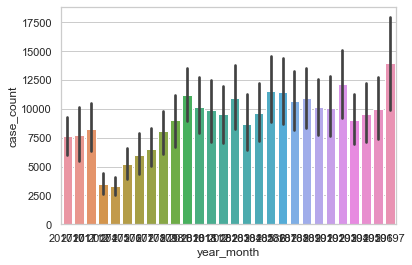

In [65]:
train_chart=train
train_chart['year_month']=train_chart['Year'].astype(str)+train_chart['Month'].astype(str)
print(train_chart.head())
print(train_chart.describe())
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x='year_month', y="case_count", data=train_chart)

In [66]:
train_chart_line=train.groupby(['application_date'])['case_count'].sum().reset_index()
train_chart_line.head()

KeyError: 'application_date'

In [67]:
sns.set(style='darkgrid')
sns.lineplot(x='application_date', y='case_count', data=train_chart_line)
plt.figure(figsize=(8,4))
plt.rcParams["figure.figsize"] = (50, 6)
plt.rcParams["xtick.labelsize"] = 7

NameError: name 'train_chart_line' is not defined

In [71]:
test_id=test

test_id.shape

(180, 11)

In [69]:
test.drop('application_date',axis=1,inplace=True)

In [25]:
def mape(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    error = (predict - actual)/actual
    abs_error = np.absolute(error)
    
    #square_distance = distance ** 2

    #mean_square_distance = square_distance.mean()

    score = np.mean(abs_error)

    return score

from sklearn.metrics import make_scorer
mape_score = make_scorer(mape,greater_is_better = False)

#gsSVR = GridSearchCV(...scoring=rmse_score...)
#gsSVR.fit(X_train,Y_train)
#SVR_best = gsSVR.best_estimator_
#print(gsSVR.best_score_)

In [26]:
#Alternate code for gridsearch/tuning

# A parameter grid for XGBoost
params = {
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.8,1],
        'max_depth': [ 5, 8,10],
        'learning_rate':[0.01,0.1,0.3],
        'n_estimators':[30,50,80]
        }



Xd,yd=train.drop('case_count',axis=1),train.case_count
from sklearn.metrics import mean_squared_error
import xgboost as xgb
xg = xgb.XGBRegressor(eval_metric='auc',verbose=100, nthread=4)          

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=13, shuffle=True)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=xg, param_grid=params, n_jobs=4,scoring=mape_score, cv=skf.split(Xd,yd), verbose=100 )
grid.fit(Xd, yd)
#print('\n All results:')
#print(grid.cv_results_)
#print('\n Best estimator:')
#print(grid.best_estimator_)
#print('\n Best score:')
#print(grid.best_score_ * 2 - 1)
#print('\n Best parameters:')
#print(grid.best_params_)
results = pd.DataFrame(grid.cv_results_)
 
results.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_tuning_aggregated_v0.3_saved.csv', index=False)
#y_test = grid.best_estimator_.predict_proba(test)
#results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
#results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pick

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    6.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  19 tasks      | elapsed:    6.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    6.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  39 tasks      | elapsed:    7.5s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    7.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:    8.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:    8.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap


Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done  81 tasks      | elapsed:    9.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done  82 tasks      | elapsed:    9.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 100 tasks      | elapsed:   10.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 101 tasks      | elapsed:   10.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:   10.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 122 tasks      | elapsed:   10.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 123 tasks      | elapsed:   11.0s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 124 tasks      | elapsed:   11.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed:   11.9s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:   12.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed:   12.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 163 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 164 tasks      | elapsed:   13.1s
[Parallel(n_jobs=4)]: Done 165 tasks      | elapsed:   13.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 185 tasks      | elapsed:   14.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=obje

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 208 tasks      | elapsed:   15.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 209 tasks      | elapsed:   15.6s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 230 tasks      | elapsed:   16.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 231 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 232 tasks      | elapsed:   16.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 249 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 250 tasks      | elapsed:   17.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 251 tasks      | elapsed:   17.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 252 tasks      | elapsed:  

[Parallel(n_jobs=4)]: Done 271 tasks      | elapsed:   19.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:   19.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 273 tasks      | elapsed:   19.1s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 293 tasks      | elapsed:   20.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 294 tasks      | elapsed:   20.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 315 tasks      | elapsed:   22.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 316 tasks      | elapsed:   22.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 317 tasks      | elapsed:   22.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:   24.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 337 tasks      | elapsed:   24.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 338 tasks      | elapsed:   24.1s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   25.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 358 tasks      | elapsed:   25.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 377 tasks      | elapsed:   26.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 378 tasks      | elapsed:   26.7s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 379 tasks      | elapsed:   26.8s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 399 tasks      | elapsed:   28.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 400 tasks      | elapsed:   28.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 419 tasks      | elapsed:   29.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=obje

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 439 tasks      | elapsed:   30.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 440 tasks      | elapsed:   30.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap


Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 460 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 461 tasks      | elapsed:   32.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 481 tasks      | elapsed:   33.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 482 tasks      | elapsed:   33.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 483 tasks      | elapsed:   33.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 503 tasks      | elapsed:   34.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   34.8s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shap

[Parallel(n_jobs=4)]: Done 523 tasks      | elapsed:   35.9s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 524 tasks      | elapsed:   35.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 525 tasks      | elapsed:   36.0s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed:   37.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 547 tasks      | elapsed:   37.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 548 tasks      | elapsed:   38.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 566 tasks      | elapsed:   39.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 567 tasks      | elapsed:   39.9s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 568 tasks      | elapsed:   40.0s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 586 tasks      | elapsed:   41.2s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 587 tasks      | elapsed:   41.2s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 588 tasks      | elapsed:   41.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 606 tasks      | elapsed:   42.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 607 tasks      | elapsed:   42.4s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 608 tasks      | elapsed:   42.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 627 tasks      | elapsed:   44.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 628 tasks      | elapsed:   44.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 629 tasks      | elapsed:   44.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 647 tasks      | elapsed:   46.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 648 tasks      | elapsed:   46.3s

Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 649 tasks      | elapsed:   46.3s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 667 tasks      | elapsed:   47.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 668 tasks      | elapsed:   47.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
[Parallel(n_jobs=4)]: Done 669 tasks      | elapsed:   47.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 689 tasks      | elapsed:   48.6s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1093,), dtype=int32).
Pickling array (shape=(557,), dtype=int32).
[Parallel(n_jobs=4)]: Done 690 tasks      | elapsed:   48.6s
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 691 tasks      | elapsed:   48.7s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

[Parallel(n_jobs=4)]: Done 712 tasks      | elapsed:   50.4s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1092,), dtype=int32).
Pickling array (shape=(558,), dtype=int32).
[Parallel(n_jobs=4)]: Done 713 tasks      | elapsed:   50.5s
Pickling array (shape=(11,), dtype=object).
Pickling array (shape=(4, 1650), dtype=int64).
Pickling array (shape=(7, 1650), dtype=uint8).
Pickling array (shape=(4,), dtype=object).
Pickling array (shape=(7,), dtype=object).
Pickling array (shape=(1650,), dtype=float64).
Pickling array (shape=(1115,), dtype=int32).
Pickling array (shape=(535,), dtype=int32).
Pickling array (shape=(11,), dtype=object).[Parallel(n_jobs=4)]: Done 714 tasks      | elapsed:   50.5s

Pickling array (shape=(4, 1650), dtype=int64).
Pickli

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [29]:
#XGBoost code,using tuned models to predict

X,y=train.drop('case_count',axis=1),train.case_count

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
xg_reg = xgb.XGBRegressor(eval_metric='mae',learning_rate = 0.1,
                max_depth = 10,colsample_bytree=1, subsample=0.6, n_estimators = 50,verbose=50)

err=[]
y_pred_tot=[]
from sklearn.model_selection import KFold,StratifiedKFold
#fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1994)

#for train_index, test_index in fold.split(X,y):
#    X_train, X_test = Xd.iloc[train_index], Xd.iloc[test_index]
#    y_train, y_test = yd[train_index], yd[test_index]
print('start')
xg_reg.fit(X,y)
#    print('pred...')
#    p=xg_reg.predict(X_test)
#    print("err: ",100*np.sqrt(mean_squared_error(y_test,p)))
#    err.append(100*np.sqrt(mean_squared_error(y_test,p)))
pred = xg_reg.predict(test)
y_pred_tot.append(pred)

start
[02:00:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [70]:
# y_pred=rf.predict(dftest_dum.drop('id',axis=1))
print(np.mean(err,0))
y_pred=np.mean(y_pred_tot,0)
print(y_pred)

s=pd.DataFrame({'case_count':y_pred})
s.to_csv('C:/Users/np8022/Desktop/Analytics Vidhya competition/LnTFS/Outputs/XGB_Aggregated_Tuned(MAPE)_0.4_saved.csv',index=False)
s.head()

nan
[  493.16946   922.5239   1951.0424   1236.9591   1398.5204   1146.6586
  1186.8615    884.17395   994.9442   2032.2095   1441.6489   1533.3823
  1379.3945   1448.5243    983.5311    992.43005  2062.6023   1398.7805
  1543.2563   1393.371    1409.0488   1091.2083    895.1706   1833.3695
  1822.7749   5286.634    1395.6985   1062.7444    931.4177    951.1101
  1751.1096   1335.5176   1402.7985   1284.9678   1400.3104   1135.4304
   919.4193   2290.7153   1532.4636   1621.8418   1272.8203   1353.4248
  1056.6837    927.92957  2237.2437   1353.5175   1479.1985   1367.8851
  1367.4012   1020.808     969.69885  2032.4067   1421.9232   1460.9567
  1481.3188   2017.4086   7789.5225    374.22882  1275.8682   1188.1482
  1117.6135    870.7744   1074.3397    851.56836   688.6576   1773.2054
  1413.9429   1572.4093   1409.562    1425.24     1074.3976    840.75415
  1809.7173   1296.206    1459.4868   1318.2899   1285.8622    899.0741
   926.7855   1806.928    1311.5874   1435.0624   1304.5057

C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\np8022\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,case_count
0,493.169464
1,922.523926
2,1951.042358
3,1236.959106
4,1398.520386
